## 함수 선언 및 import

In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## 공휴일 데이터
from workalendar.asia import SouthKorea
cal = SouthKorea()

pd.options.display.max_columns = 50

from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import koreanize_matplotlib
import sklearn
import matplotlib
import xgboost
import lightgbm
import sys
import catboost
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score,train_test_split,KFold
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

In [322]:
print("Python version:", sys.version)
print("pandas version: {}". format(pd.__version__))
print("NumPy version: {}". format(np.__version__))
print("scikit-learn version: {}". format(sklearn.__version__))
print("matplotlib version: {}". format(matplotlib.__version__))
print("seaborn version: {}". format(sns.__version__))
print("XGBoost version: {}". format(xgboost.__version__))
print("catboost version: {}". format(catboost.__version__))
print("lightgbm version: {}". format(lightgbm.__version__))

Python version: 3.10.12 | packaged by conda-forge | (main, Jun 23 2023, 22:34:57) [MSC v.1936 64 bit (AMD64)]
pandas version: 1.5.3
NumPy version: 1.23.5
scikit-learn version: 1.2.2
matplotlib version: 3.7.3
seaborn version: 0.12.2
XGBoost version: 2.0.0
catboost version: 1.2.2
lightgbm version: 4.1.0


## 데이터 전처리

In [323]:
data = pd.read_csv('train.csv')
data.head()

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg)
0,TG_A_J_20190101,2019-01-01,TG,A,J,0.0,0.0
1,TG_A_J_20190102,2019-01-02,TG,A,J,0.0,0.0
2,TG_A_J_20190103,2019-01-03,TG,A,J,60601.0,1728.0
3,TG_A_J_20190104,2019-01-04,TG,A,J,25000.0,1408.0
4,TG_A_J_20190105,2019-01-05,TG,A,J,32352.0,1250.0


In [324]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


In [325]:
## location 원핫인코딩
data['location'] = np.where(data['location']=='J',0,1)

In [326]:
data['timestamp'] = pd.to_datetime(data['timestamp'])

In [327]:
## 감귤,브로콜리,무,당근,양배추 각각 나누어 예측하기위해 다음과 같이 진행했습니다.
data_TG = data[data['item']=='TG'].copy()
data_BC = data[data['item']=='BC'].copy()
data_RD = data[data['item']=='RD'].copy()
data_CR = data[data['item']=='CR'].copy()
data_CB = data[data['item']=='CB'].copy()

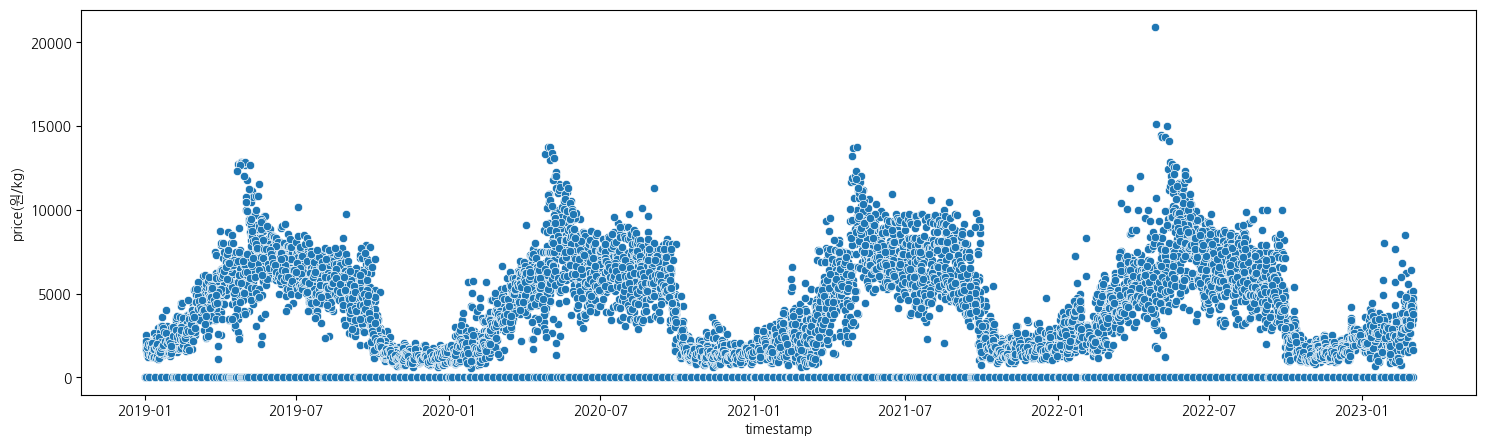

In [328]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_TG,x='timestamp',y='price(원/kg)')
plt.show()

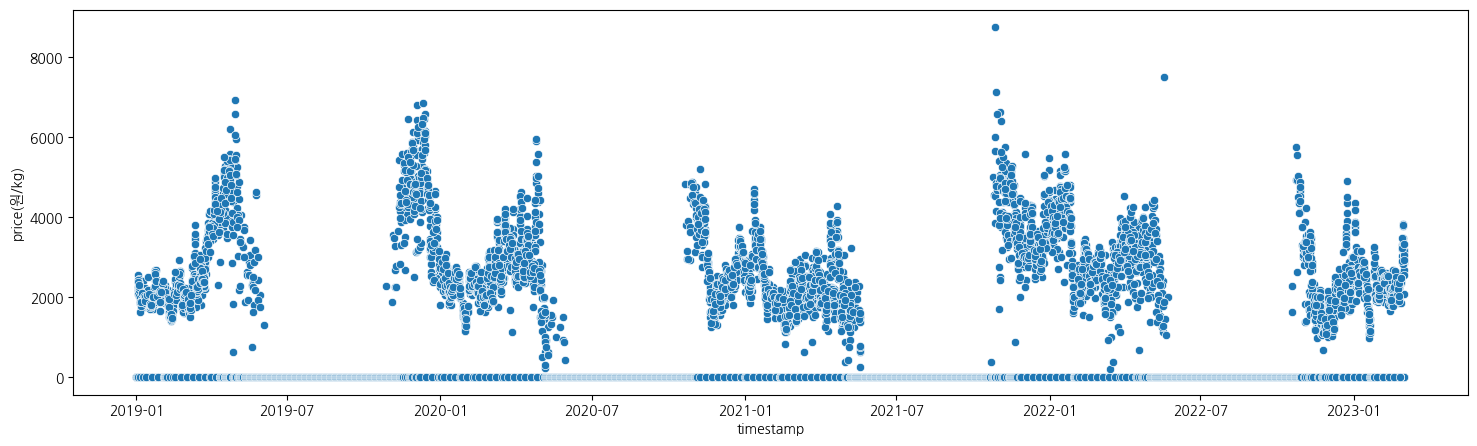

In [329]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_BC,x='timestamp',y='price(원/kg)')
plt.show()

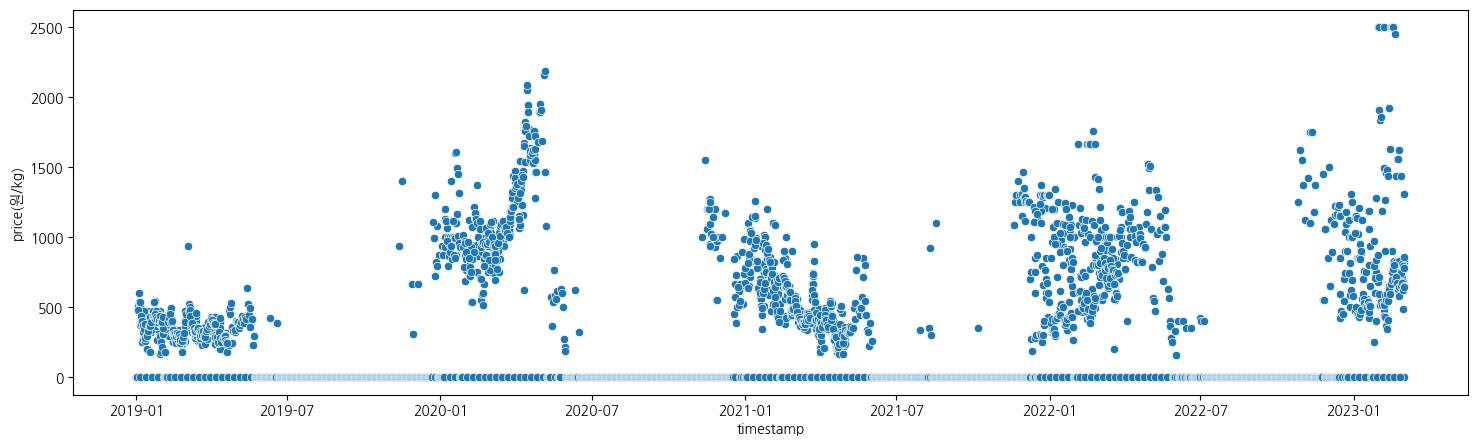

In [330]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_CB,x='timestamp',y='price(원/kg)')
plt.show()

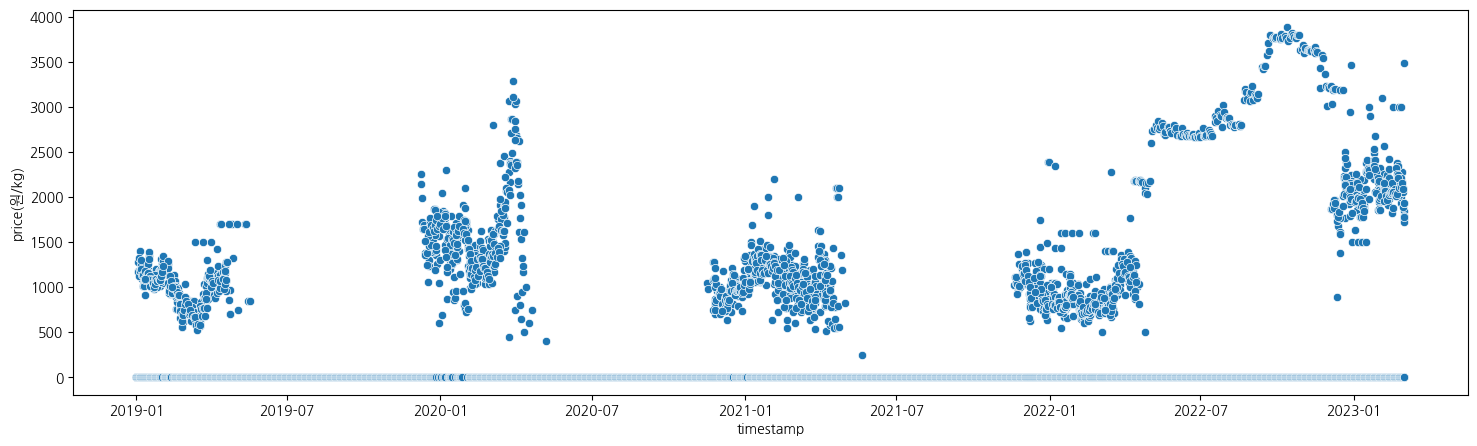

In [331]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_CR,x='timestamp',y='price(원/kg)')
plt.show()

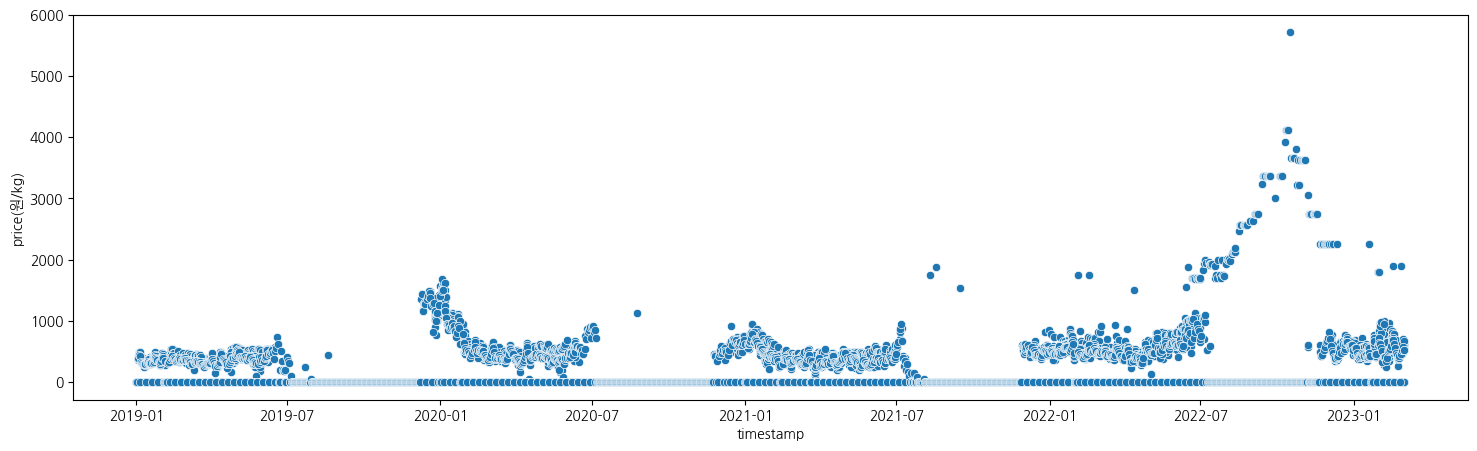

In [332]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_RD,x='timestamp',y='price(원/kg)')
plt.show()

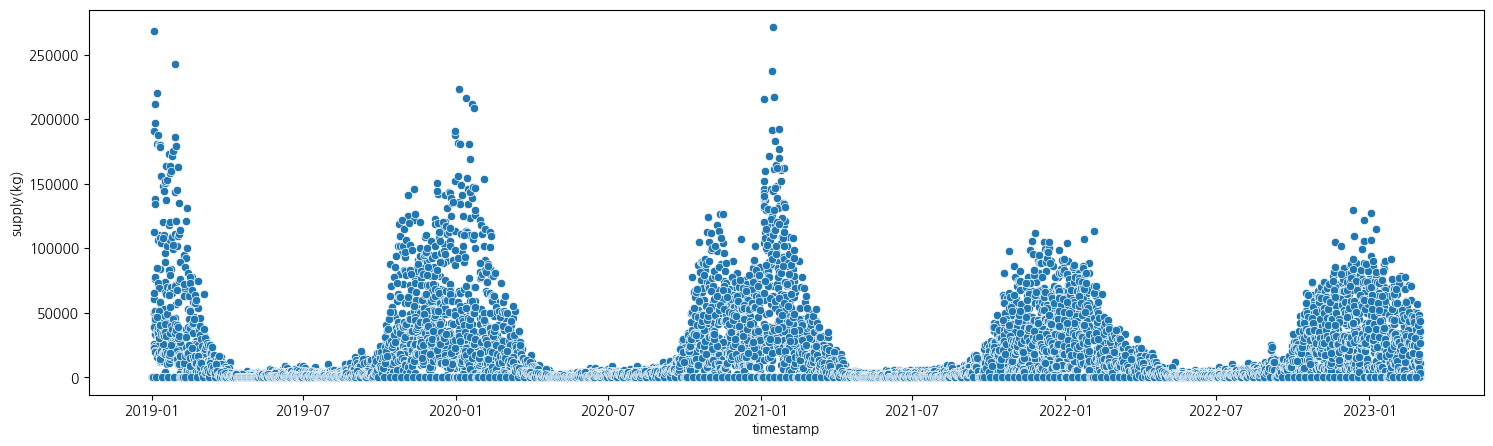

In [333]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_TG,x='timestamp',y='supply(kg)')
plt.show()

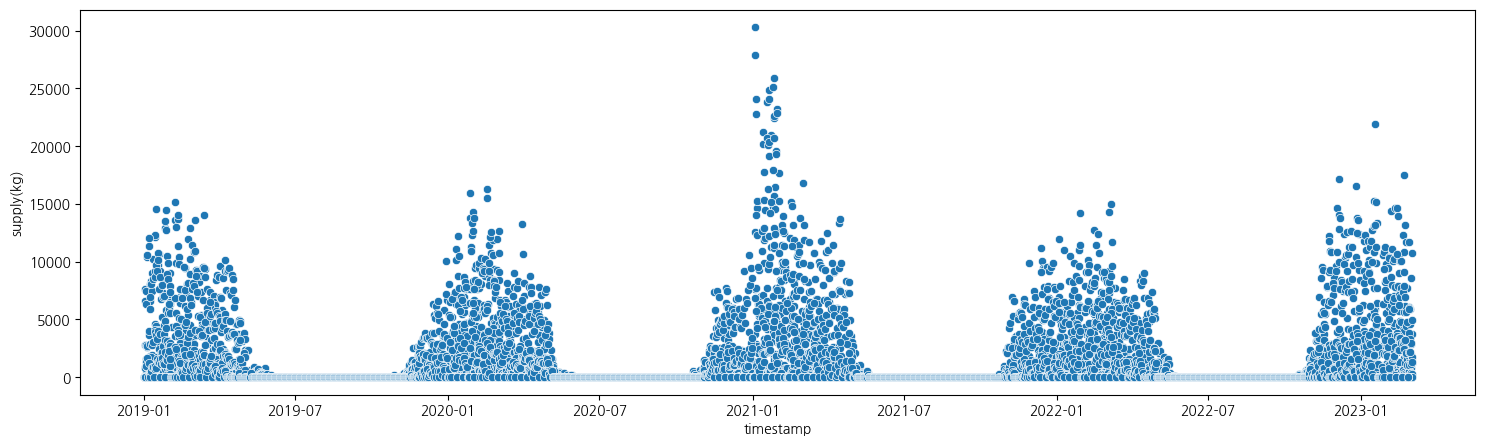

In [334]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_BC,x='timestamp',y='supply(kg)')
plt.show()

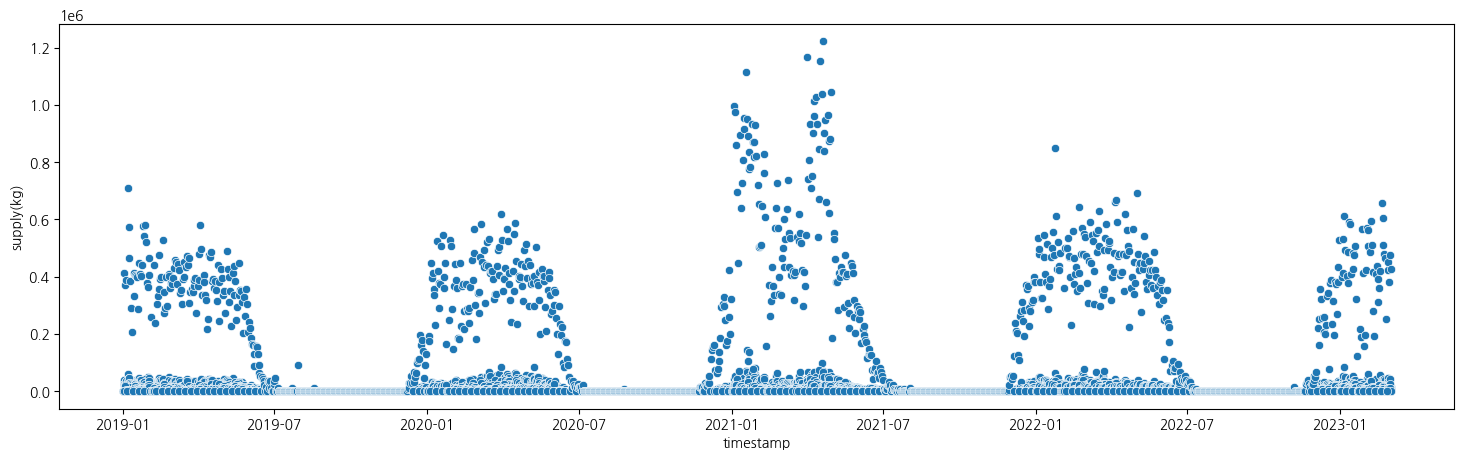

In [335]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_RD,x='timestamp',y='supply(kg)')
plt.show()

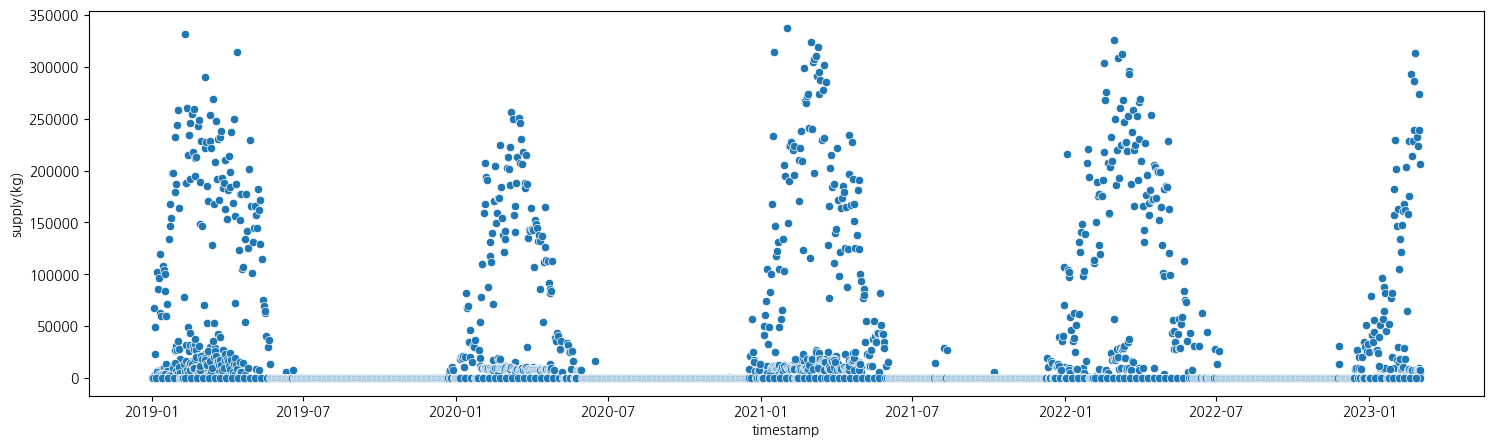

In [336]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_CB,x='timestamp',y='supply(kg)')
plt.show()

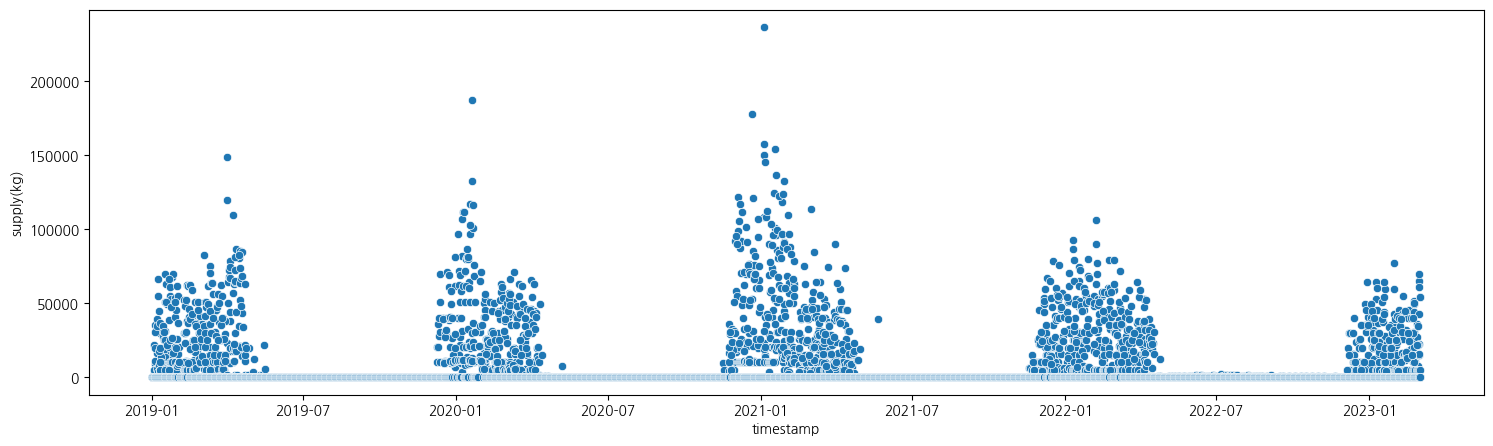

In [337]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=data_CR,x='timestamp',y='supply(kg)')
plt.show()

In [338]:
# plt.figure(figsize=(18,5))
# plt.subplot(2,1,1)
# sns.lineplot(data=data_TG, x='timestamp', y='price(원/kg)')
# plt.subplot(2,1,2)
# sns.lineplot(data=data_TG, x='timestamp', y='supply(kg)')
# plt.tight_layout()
# plt.show()

In [339]:
# plt.figure(figsize=(18,5))
# plt.subplot(2,1,1)
# sns.lineplot(data=data_CR, x='timestamp', y='price(원/kg)')
# plt.subplot(2,1,2)
# sns.lineplot(data=data_CR, x='timestamp', y='supply(kg)')
# plt.tight_layout()
# plt.show()

In [340]:
## 각각의 데이터에 연도, 월, 요일 데이터를 만들었습니다.
data_TG['year'] = data_TG['timestamp'].dt.year
data_TG['month'] = data_TG['timestamp'].dt.month
data_TG['dayofweek'] = data_TG['timestamp'].dt.dayofweek

data_BC['year'] = data_BC['timestamp'].dt.year
data_BC['month'] = data_BC['timestamp'].dt.month
data_BC['dayofweek'] = data_BC['timestamp'].dt.dayofweek

data_RD['year'] = data_RD['timestamp'].dt.year
data_RD['month'] = data_RD['timestamp'].dt.month
data_RD['dayofweek'] = data_RD['timestamp'].dt.dayofweek

data_CR['year'] = data_CR['timestamp'].dt.year
data_CR['month'] = data_CR['timestamp'].dt.month
data_CR['dayofweek'] = data_CR['timestamp'].dt.dayofweek

data_CB['year'] = data_CB['timestamp'].dt.year
data_CB['month'] = data_CB['timestamp'].dt.month
data_CB['dayofweek'] = data_CB['timestamp'].dt.dayofweek

In [341]:
data_TG[(data_TG['price(원/kg)']==0) & (data_TG['year']==2022)& (data_TG['month']==2)& (data_TG['corporation']=='C')].sort_values(by='timestamp')

,ID,timestamp,item,corporation,location,supply(kg),price(원/kg),year,month,dayofweek
7219,TG_C_J_20220201,2022-02-01,TG,C,0,0.0,0.0,2022,2,1
8742,TG_C_S_20220201,2022-02-01,TG,C,1,0.0,0.0,2022,2,1
7220,TG_C_J_20220202,2022-02-02,TG,C,0,0.0,0.0,2022,2,2
8743,TG_C_S_20220202,2022-02-02,TG,C,1,0.0,0.0,2022,2,2
7221,TG_C_J_20220203,2022-02-03,TG,C,0,0.0,0.0,2022,2,3
8744,TG_C_S_20220203,2022-02-03,TG,C,1,0.0,0.0,2022,2,3
7224,TG_C_J_20220206,2022-02-06,TG,C,0,0.0,0.0,2022,2,6
8747,TG_C_S_20220206,2022-02-06,TG,C,1,0.0,0.0,2022,2,6
7231,TG_C_J_20220213,2022-02-13,TG,C,0,0.0,0.0,2022,2,6
8754,TG_C_S_20220213,2022-02-13,TG,C,1,0.0,0.0,2022,2,6


In [342]:
data_TG[data_TG['price(원/kg)']==0]['dayofweek'].value_counts()

6    2160
5     313
3     229
0     221
4     219
2     215
1     198
Name: dayofweek, dtype: int64

In [343]:
data_BC[data_BC['price(원/kg)']==0]['dayofweek'].value_counts()

6    1949
5    1217
1    1210
4    1210
2    1202
3    1199
0    1195
Name: dayofweek, dtype: int64

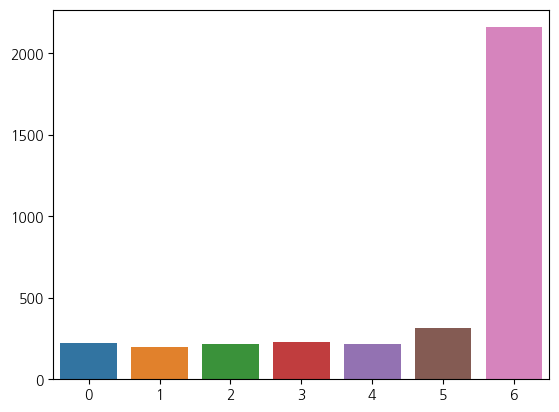

In [344]:
sns.barplot(x= data_TG[data_TG['price(원/kg)']==0]['dayofweek'].value_counts().index,y=data_TG[data_TG['price(원/kg)']==0]['dayofweek'].value_counts().values)
plt.show()

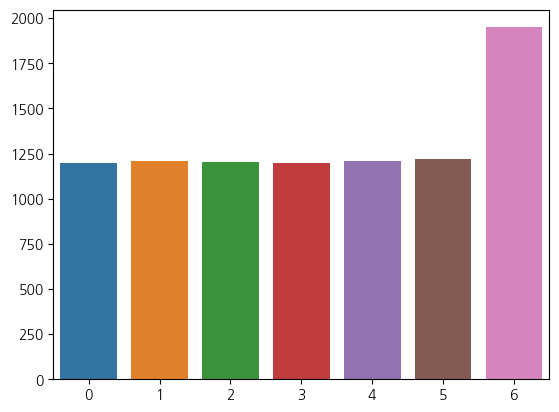

In [345]:
sns.barplot(x= data_BC[data_BC['price(원/kg)']==0]['dayofweek'].value_counts().index,y=data_BC[data_BC['price(원/kg)']==0]['dayofweek'].value_counts().values)
plt.show()

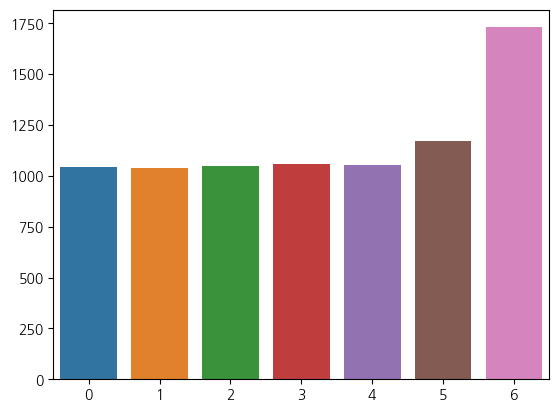

In [346]:
sns.barplot(x= data_RD[data_RD['price(원/kg)']==0]['dayofweek'].value_counts().index,y=data_RD[data_RD['price(원/kg)']==0]['dayofweek'].value_counts().values)
plt.show()

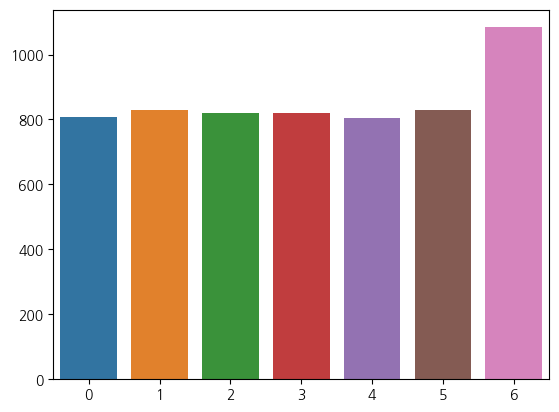

In [347]:
sns.barplot(x= data_CB[data_CB['price(원/kg)']==0]['dayofweek'].value_counts().index,y=data_CB[data_CB['price(원/kg)']==0]['dayofweek'].value_counts().values)
plt.show()

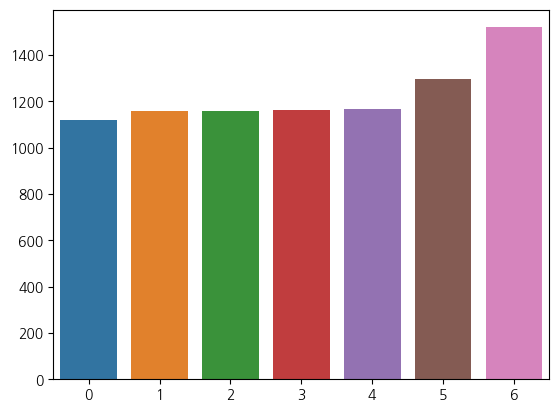

In [348]:
sns.barplot(x= data_CR[data_CR['price(원/kg)']==0]['dayofweek'].value_counts().index,y=data_CR[data_CR['price(원/kg)']==0]['dayofweek'].value_counts().values)
plt.show()

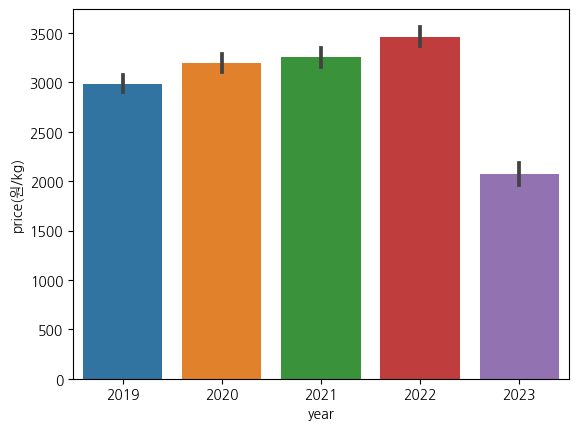

In [349]:
sns.barplot(data=data_TG,x='year',y='price(원/kg)')
plt.show()

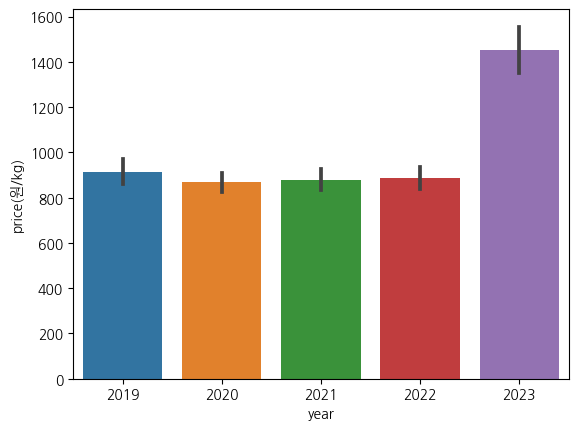

In [350]:
sns.barplot(data=data_BC,x='year',y='price(원/kg)')
plt.show()

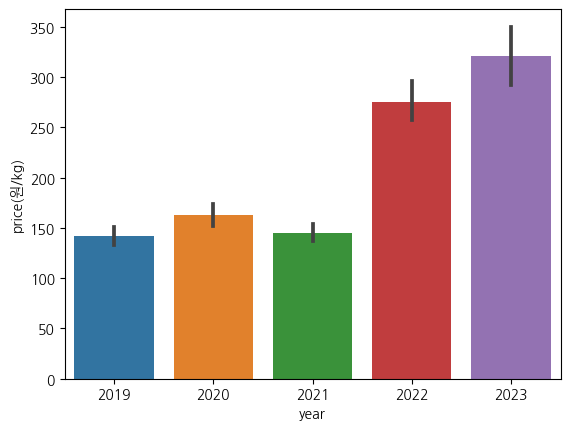

In [351]:
sns.barplot(data=data_RD,x='year',y='price(원/kg)')
plt.show()

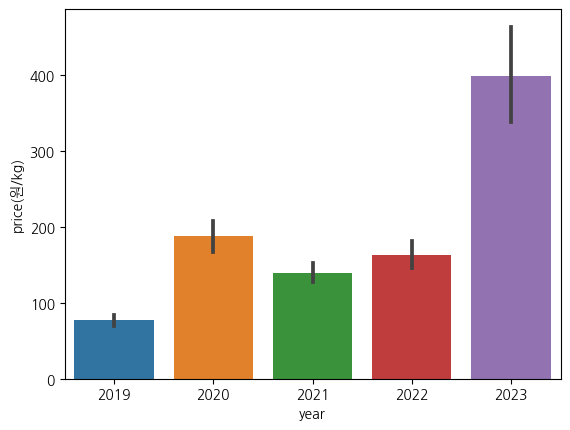

In [352]:
sns.barplot(data=data_CB,x='year',y='price(원/kg)')
plt.show()

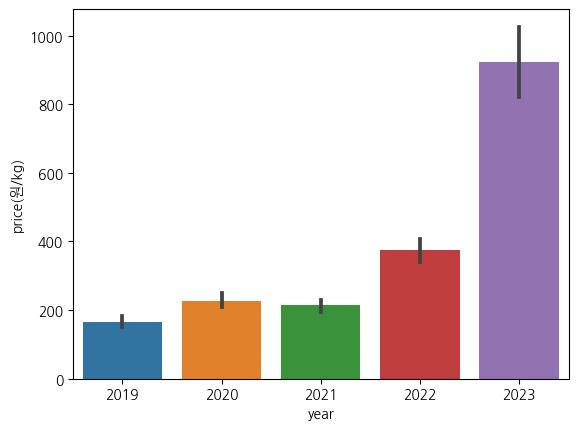

In [353]:
sns.barplot(data=data_CR,x='year',y='price(원/kg)')
plt.show()

In [354]:
## item열 drop
data_TG = data_TG.drop('item',axis=1)
data_BC = data_BC.drop('item',axis=1)
data_RD = data_RD.drop('item',axis=1)
data_CR = data_CR.drop('item',axis=1)
data_CB = data_CB.drop('item',axis=1)

In [355]:
## 2019년 부터 2023년의 법정공휴일 데이터
holiday_2019=pd.DataFrame(cal.holidays(2019))
holiday_2020=pd.DataFrame(cal.holidays(2020))
holiday_2021=pd.DataFrame(cal.holidays(2021))
holiday_2022=pd.DataFrame(cal.holidays(2022))
holiday_2023=pd.DataFrame(cal.holidays(2023))

holiday = pd.concat([holiday_2019,holiday_2020,holiday_2021,holiday_2022,holiday_2023],axis=0)
holiday

,0,1
0,2019-01-01,New year
1,2019-02-04,Korean New Year's Day
2,2019-02-05,Korean New Year's Day
3,2019-02-06,Korean New Year's Day
4,2019-03-01,Independence Day
...,...,...
10,2023-09-29,Midautumn Festival
11,2023-09-30,Midautumn Festival
12,2023-10-03,National Foundation Day
13,2023-10-09,Hangul Day


In [356]:
## 공휴일(법정 공휴일과 토요일, 일요일)데이터 열을 만들기 위해 다음과 같이 진행했습니다.
holiday = holiday.rename(columns={0:'timestamp'})
holiday['timestamp'] = pd.to_datetime(holiday['timestamp'])

## 감귤
data_TG = pd.merge(data_TG,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
data_TG['holiday'] = data_TG['holiday'].fillna(0)
data_TG['holiday'] = np.where(data_TG['holiday']==0,0,1)
data_TG['holiday'] = np.where(data_TG['dayofweek']>=5,1,data_TG['holiday'])

## 브로콜리
data_BC = pd.merge(data_BC,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
data_BC['holiday'] = data_BC['holiday'].fillna(0)
data_BC['holiday'] = np.where(data_BC['holiday']==0,0,1)
data_BC['holiday'] = np.where(data_BC['dayofweek']>=5,1,data_BC['holiday'])

## 무
data_RD = pd.merge(data_RD,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
data_RD['holiday'] = data_RD['holiday'].fillna(0)
data_RD['holiday'] = np.where(data_RD['holiday']==0,0,1)
data_RD['holiday'] = np.where(data_RD['dayofweek']>=5,1,data_RD['holiday'])

## 당근
data_CR = pd.merge(data_CR,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
data_CR['holiday'] = data_CR['holiday'].fillna(0)
data_CR['holiday'] = np.where(data_CR['holiday']==0,0,1)
data_CR['holiday'] = np.where(data_CR['dayofweek']>=5,1,data_CR['holiday'])

## 양배추
data_CB = pd.merge(data_CB,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
data_CB['holiday'] = data_CB['holiday'].fillna(0)
data_CB['holiday'] = np.where(data_CB['holiday']==0,0,1)
data_CB['holiday'] = np.where(data_CB['dayofweek']>=5,1,data_CB['holiday'])

## 12월 ~ 2월 -> 겨울
## 3월 ~ 5월 -> 봄
## 6월 ~ 8월 -> 여름
## 9월 ~ 11월 -> 가을
## 계절데이터를 만들어 주었습니다.
data_TG['season'] = data_TG['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})
data_BC['season'] = data_BC['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})
data_RD['season'] = data_RD['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})
data_CR['season'] = data_CR['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})
data_CB['season'] = data_CB['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})

In [357]:
## international_trade.csv에 있는 정보 중 '무'데이터는 데이터 수가 적어 제외하였고,
## 감귤, 브로콜리, 당근, 양배추 데이터는 활용했습니다.
inter = pd.read_csv('international_trade.csv')

## 무역수지 데이터 제거
inter = inter.drop('무역수지',axis=1)
inter = inter.rename(columns={'기간':'timestamp','수출 중량':'Export supply(kg)','수출 금액':'Export price','수입 중량':'import supply(kg)','수입 금액':'import price'})
inter['timestamp'] = pd.to_datetime(inter['timestamp'])

inter_tg = inter[inter['품목명']=='감귤'].reset_index(drop=True)
inter_bc = inter[inter['품목명']=='꽃양배추와 브로콜리(broccoli)'].reset_index(drop=True)
inter_cb = inter[inter['품목명']=='양배추'].reset_index(drop=True)
inter_cr = inter[inter['품목명']=='당근'].reset_index(drop=True)

inter_tg = inter_tg.drop('품목명',axis=1)
inter_bc = inter_bc.drop('품목명',axis=1)
inter_cb = inter_cb.drop('품목명',axis=1)
inter_cr = inter_cr.drop('품목명',axis=1)

data_TG = pd.merge(data_TG,inter_tg,how='left',on='timestamp')
data_BC = pd.merge(data_BC,inter_bc,how='left',on='timestamp')
data_CR = pd.merge(data_CR,inter_cr,how='left',on='timestamp')
data_CB = pd.merge(data_CB,inter_cb,how='left',on='timestamp')

data_TG['Export supply(kg)'] = data_TG['Export supply(kg)'].fillna(method='ffill')
data_TG['Export price'] = data_TG['Export price'].fillna(method='ffill')
data_TG['import supply(kg)'] = data_TG['import supply(kg)'].fillna(method='ffill')
data_TG['import price'] = data_TG['import price'].fillna(method='ffill')

data_BC['Export supply(kg)'] = data_BC['Export supply(kg)'].fillna(method='ffill')
data_BC['Export price'] = data_BC['Export price'].fillna(method='ffill')
data_BC['import supply(kg)'] = data_BC['import supply(kg)'].fillna(method='ffill')
data_BC['import price'] = data_BC['import price'].fillna(method='ffill')

data_CR['Export supply(kg)'] = data_CR['Export supply(kg)'].fillna(method='ffill')
data_CR['Export price'] = data_CR['Export price'].fillna(method='ffill')
data_CR['import supply(kg)'] = data_CR['import supply(kg)'].fillna(method='ffill')
data_CR['import price'] = data_CR['import price'].fillna(method='ffill')

data_CB['Export supply(kg)'] = data_CB['Export supply(kg)'].fillna(method='ffill')
data_CB['Export price'] = data_CB['Export price'].fillna(method='ffill')
data_CB['import supply(kg)'] = data_CB['import supply(kg)'].fillna(method='ffill')
data_CB['import price'] = data_CB['import price'].fillna(method='ffill')

## 몇주차인지 알수있는 '주'데이터
data_TG['week'] = data_TG['timestamp'].dt.isocalendar().week
data_BC['week'] = data_BC['timestamp'].dt.isocalendar().week
data_RD['week'] = data_RD['timestamp'].dt.isocalendar().week
data_CB['week'] = data_CB['timestamp'].dt.isocalendar().week
data_CR['week'] = data_CR['timestamp'].dt.isocalendar().week

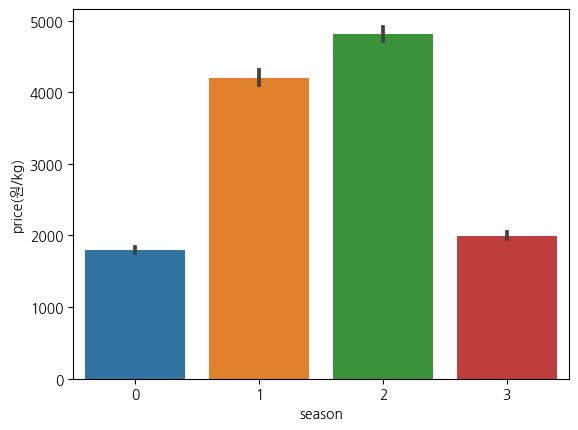

In [358]:
sns.barplot(data=data_TG,x='season',y='price(원/kg)')
plt.show()

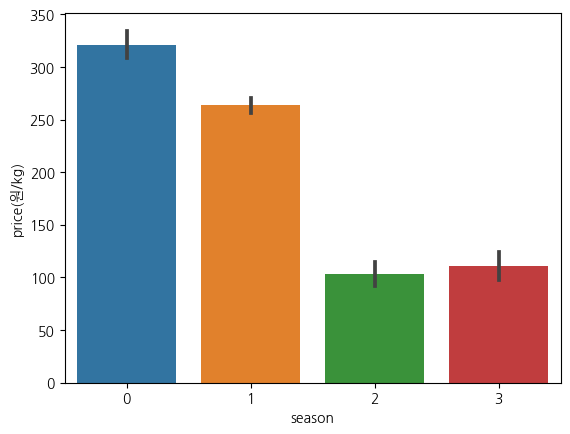

In [359]:
sns.barplot(data=data_RD,x='season',y='price(원/kg)')
plt.show()

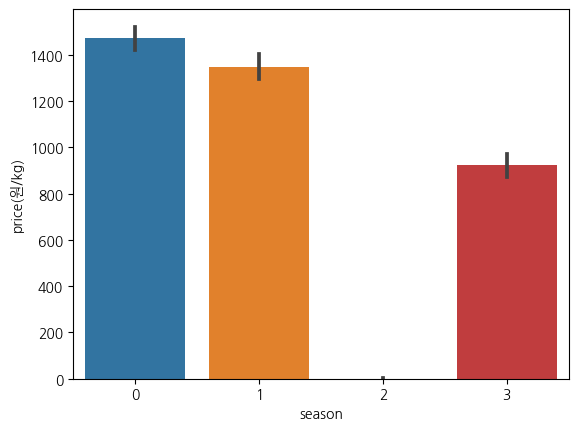

In [360]:
sns.barplot(data=data_BC,x='season',y='price(원/kg)')
plt.show()

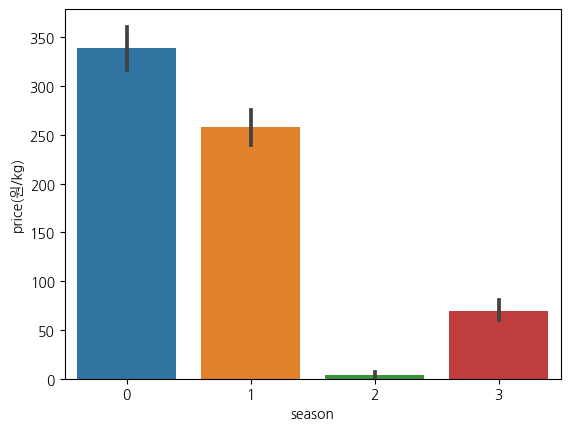

In [361]:
sns.barplot(data=data_CB,x='season',y='price(원/kg)')
plt.show()

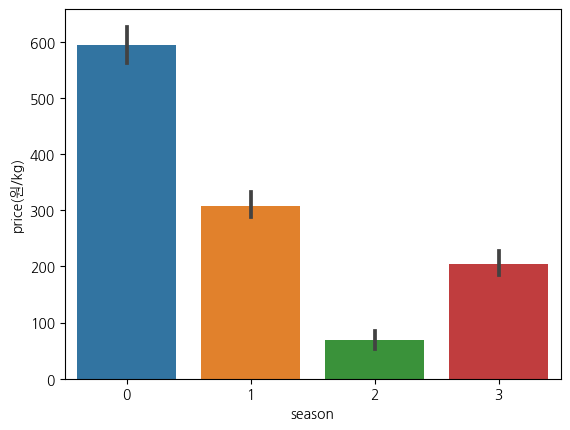

In [362]:
sns.barplot(data=data_CR,x='season',y='price(원/kg)')
plt.show()

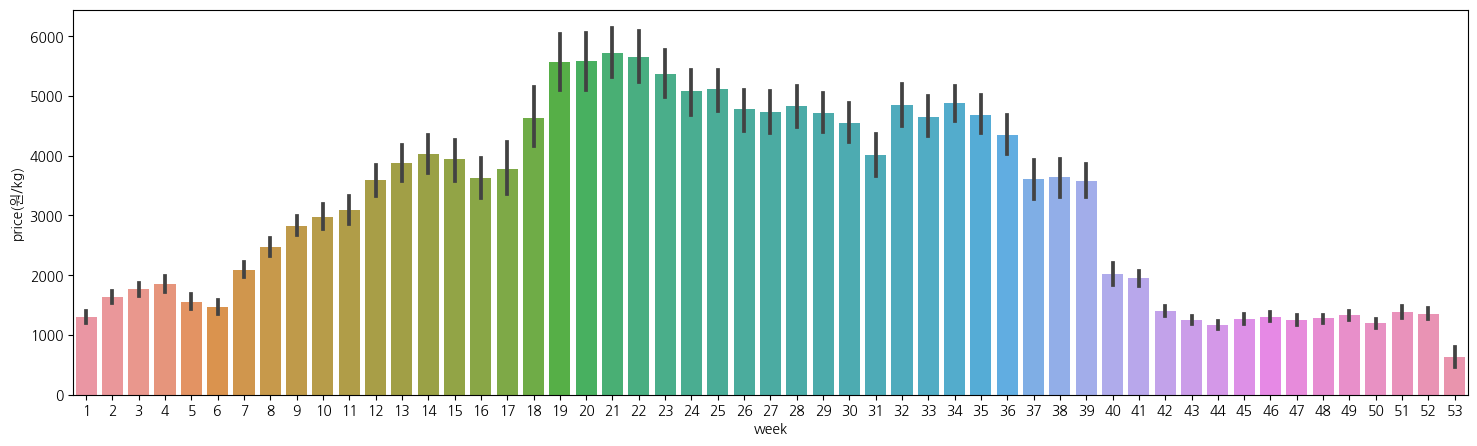

In [363]:
plt.figure(figsize=(18,5))
sns.barplot(data=data_TG,x='week',y='price(원/kg)')
plt.show()

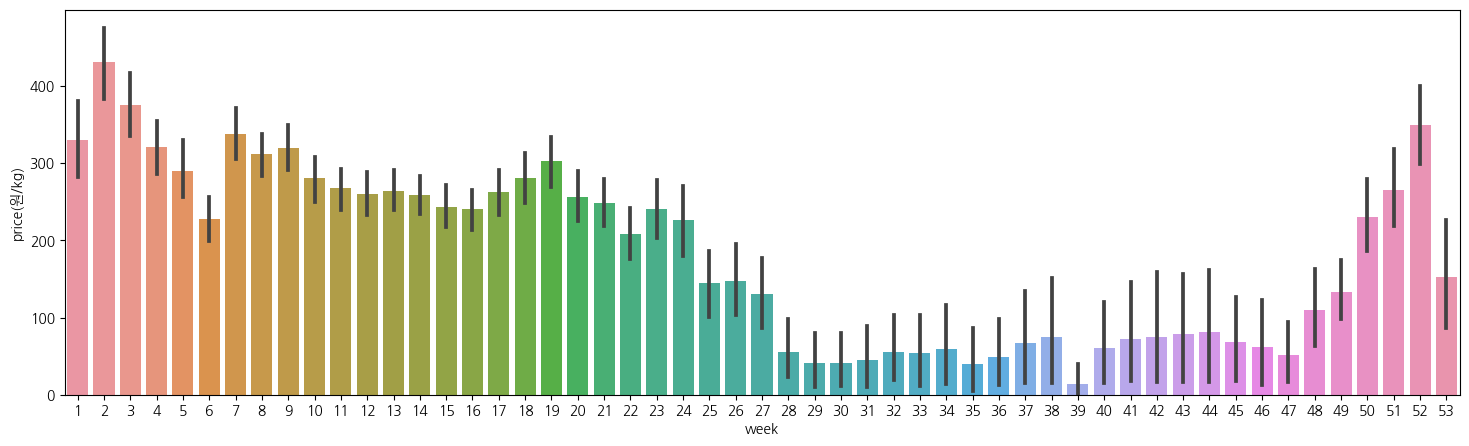

In [364]:
plt.figure(figsize=(18,5))
sns.barplot(data=data_RD,x='week',y='price(원/kg)')
plt.show()

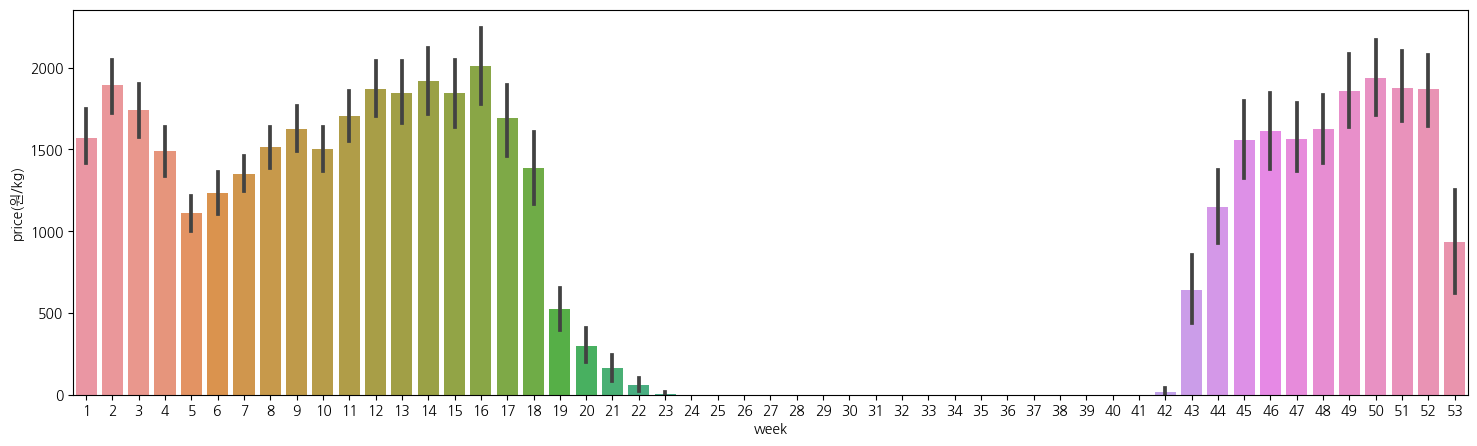

In [365]:
plt.figure(figsize=(18,5))
sns.barplot(data=data_BC,x='week',y='price(원/kg)')
plt.show()

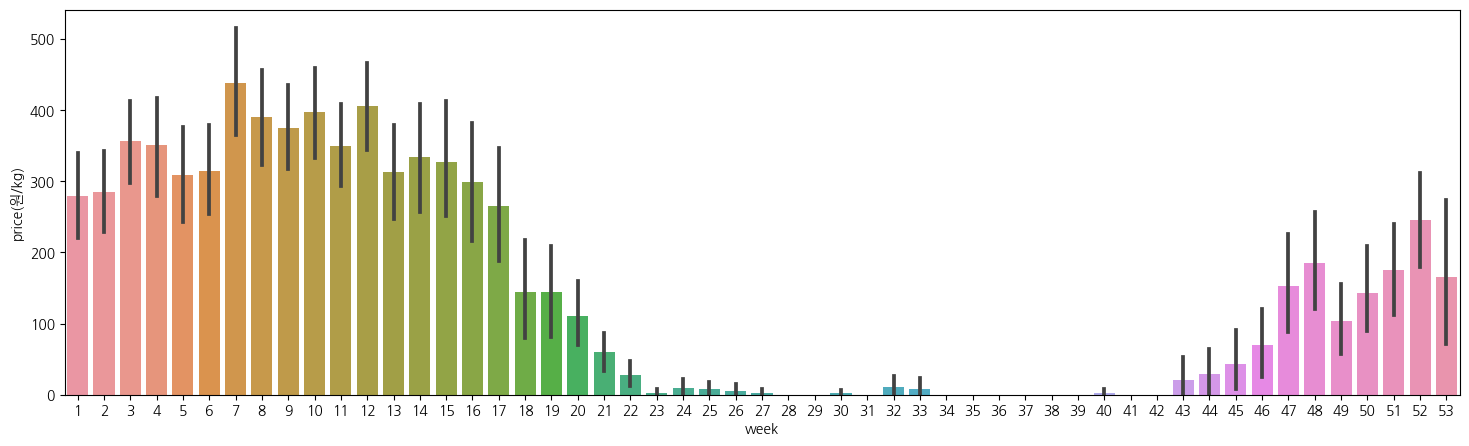

In [366]:
plt.figure(figsize=(18,5))
sns.barplot(data=data_CB,x='week',y='price(원/kg)')
plt.show()

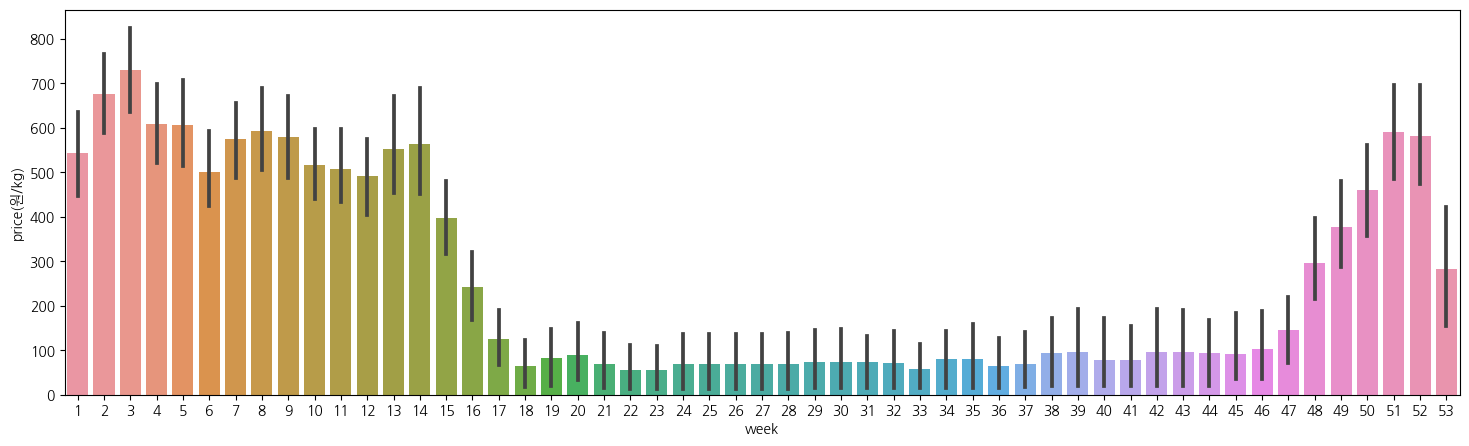

In [367]:
plt.figure(figsize=(18,5))
sns.barplot(data=data_CR,x='week',y='price(원/kg)')
plt.show()

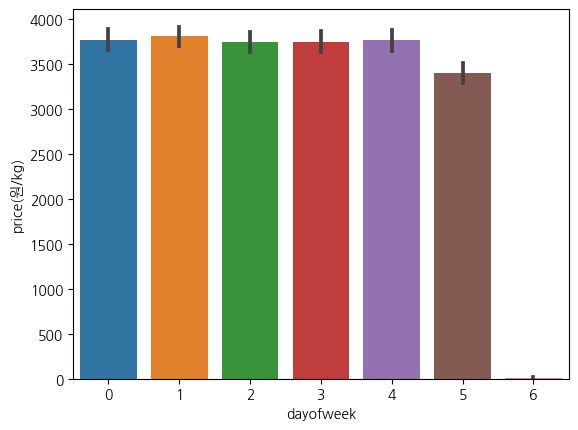

In [368]:

sns.barplot(data=data_TG,x='dayofweek',y='price(원/kg)')
plt.show()

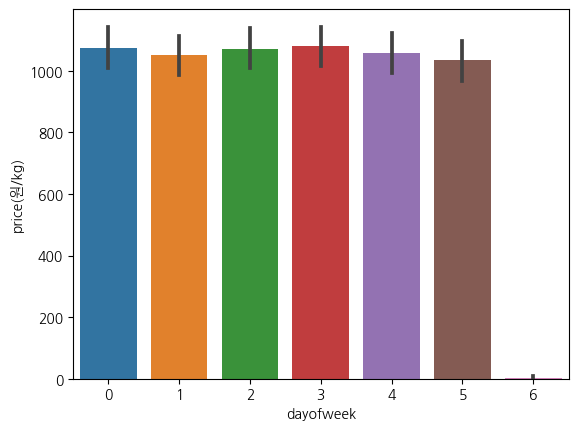

In [369]:

sns.barplot(data=data_BC,x='dayofweek',y='price(원/kg)')
plt.show()

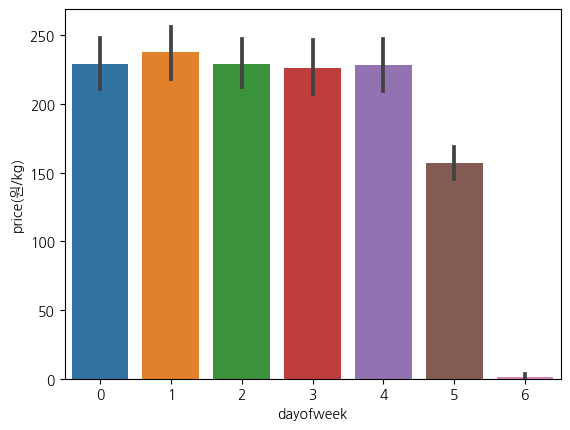

In [370]:

sns.barplot(data=data_RD,x='dayofweek',y='price(원/kg)')
plt.show()

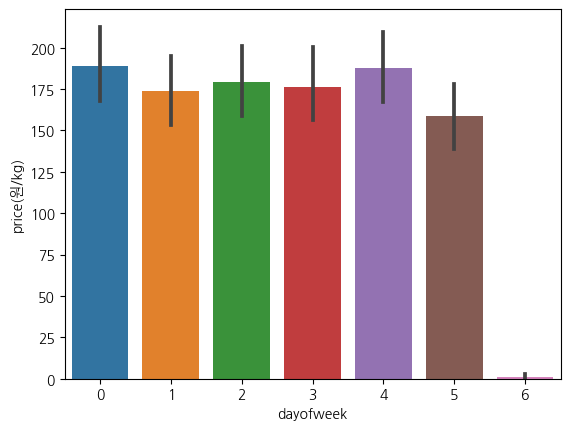

In [371]:

sns.barplot(data=data_CB,x='dayofweek',y='price(원/kg)')
plt.show()

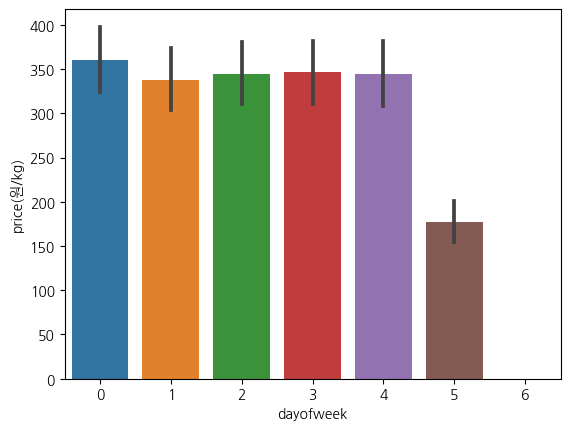

In [372]:

sns.barplot(data=data_CR,x='dayofweek',y='price(원/kg)')
plt.show()

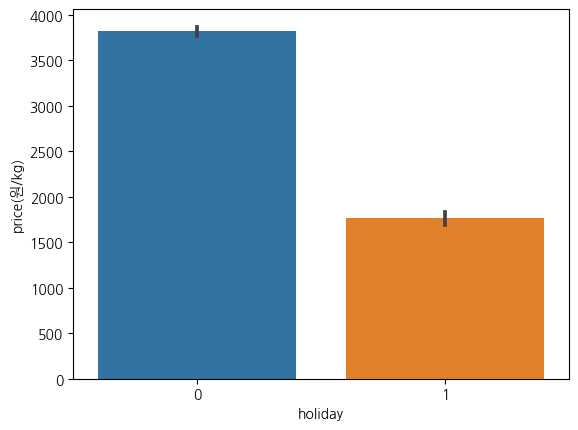

In [373]:
sns.barplot(data=data_TG,x='holiday',y='price(원/kg)')
plt.show()

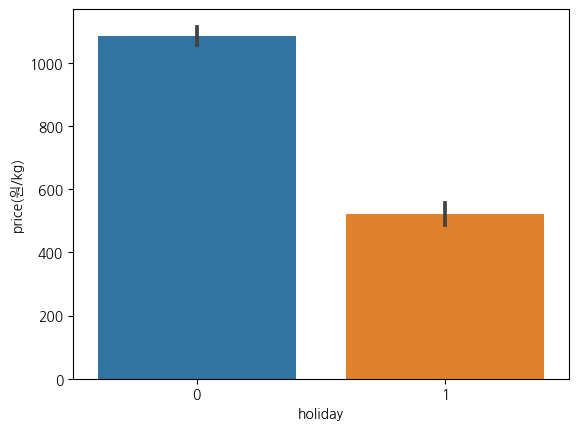

In [374]:
sns.barplot(data=data_BC,x='holiday',y='price(원/kg)')
plt.show()

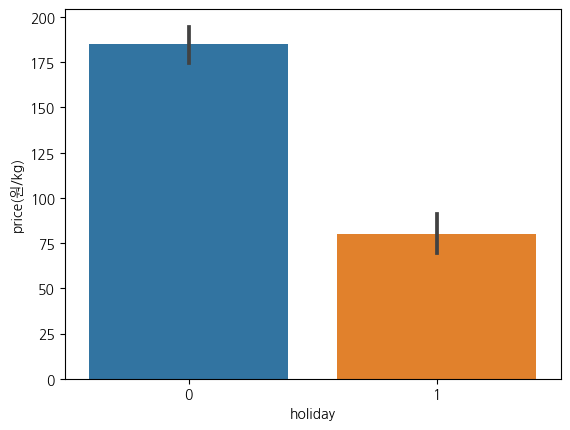

In [375]:
sns.barplot(data=data_CB,x='holiday',y='price(원/kg)')
plt.show()

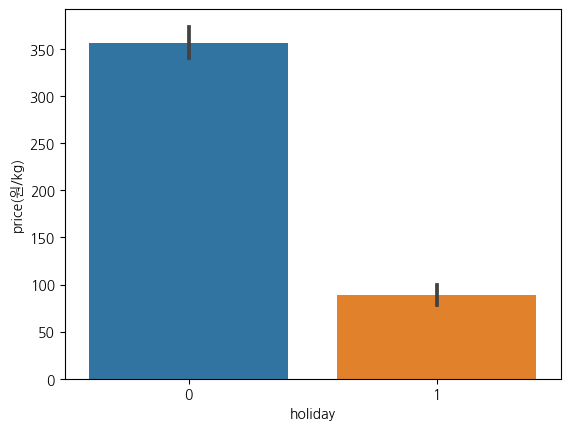

In [376]:
sns.barplot(data=data_CR,x='holiday',y='price(원/kg)')
plt.show()

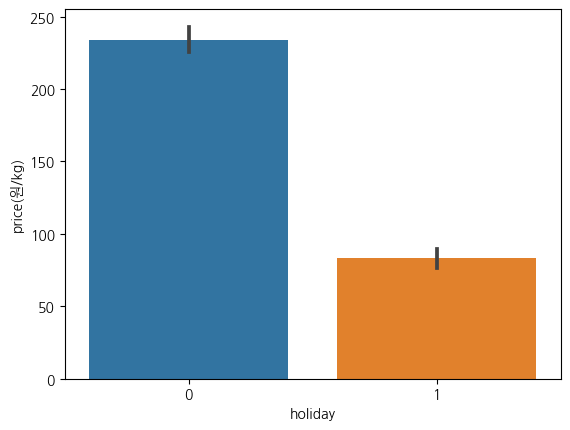

In [377]:
sns.barplot(data=data_RD,x='holiday',y='price(원/kg)')
plt.show()

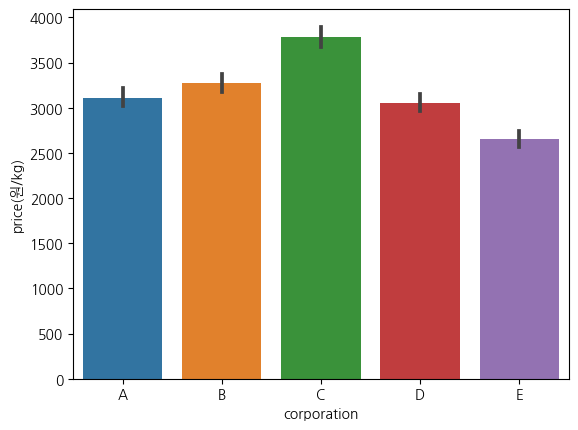

In [378]:
sns.barplot(data=data_TG,x='corporation',y='price(원/kg)')
plt.show()

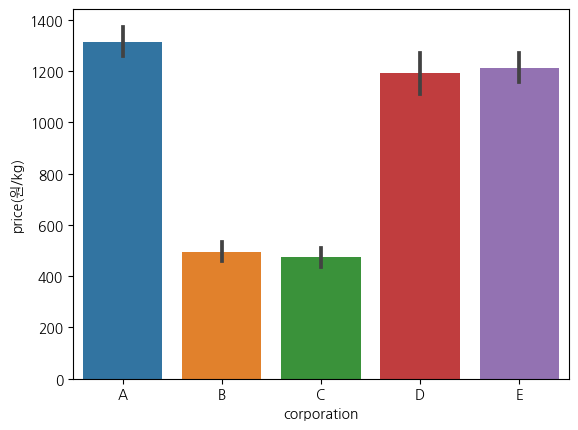

In [379]:
sns.barplot(data=data_BC,x='corporation',y='price(원/kg)')
plt.show()

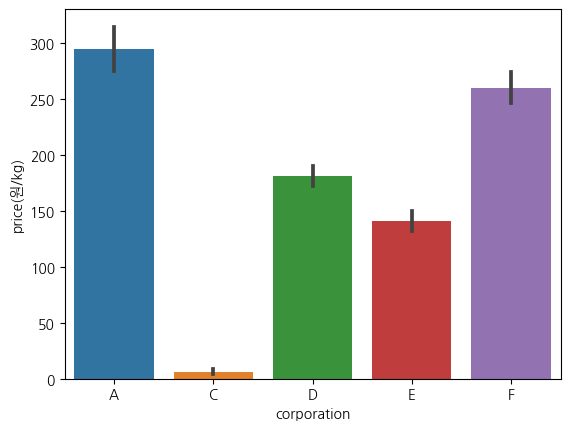

In [380]:
sns.barplot(data=data_RD,x='corporation',y='price(원/kg)')
plt.show()

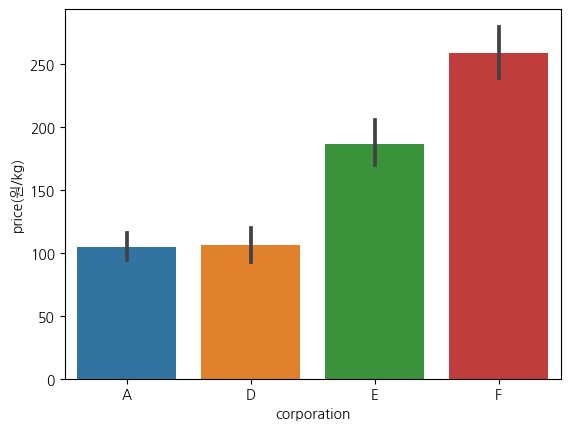

In [381]:
sns.barplot(data=data_CB,x='corporation',y='price(원/kg)')
plt.show()

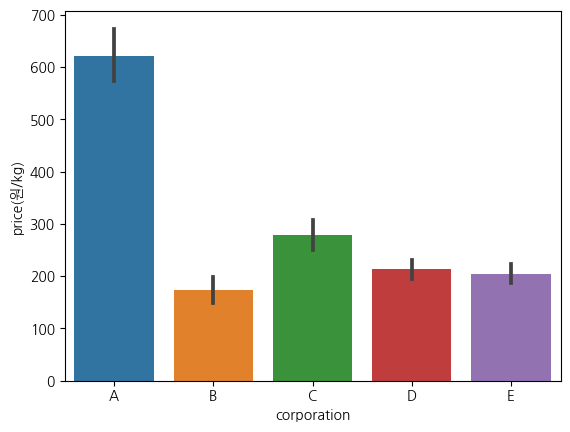

In [382]:
sns.barplot(data=data_CR,x='corporation',y='price(원/kg)')
plt.show()

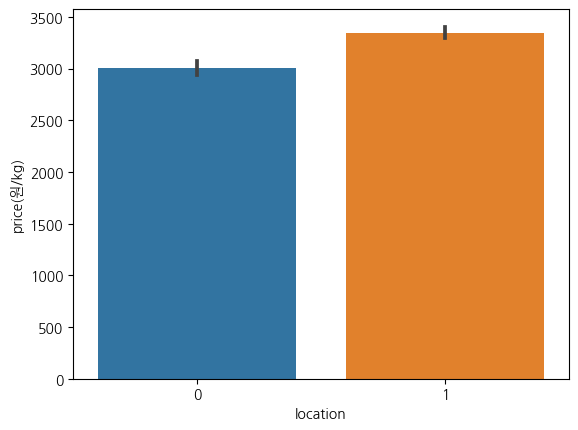

In [383]:
sns.barplot(data=data_TG,x='location',y='price(원/kg)')
plt.show()

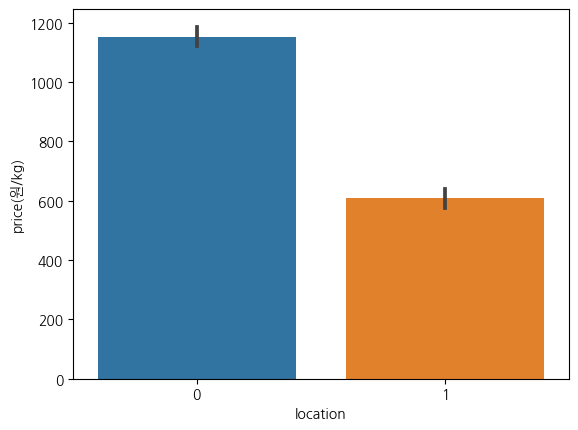

In [384]:
sns.barplot(data=data_BC,x='location',y='price(원/kg)')
plt.show()

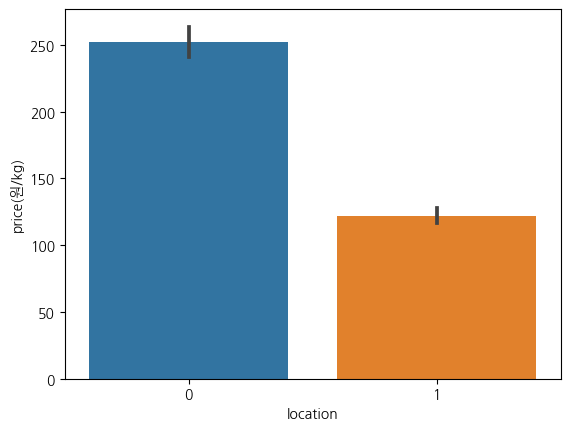

In [385]:
sns.barplot(data=data_RD,x='location',y='price(원/kg)')
plt.show()

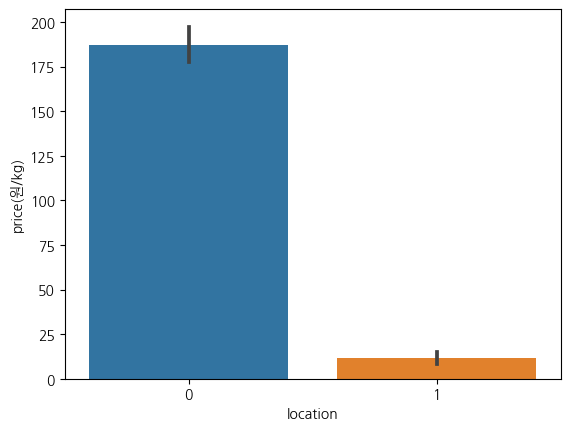

In [386]:
sns.barplot(data=data_CB,x='location',y='price(원/kg)')
plt.show()

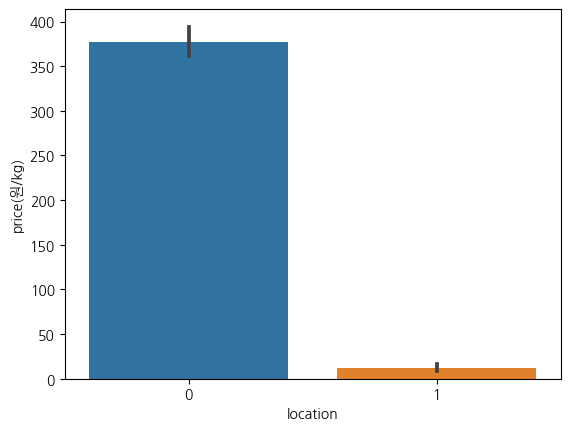

In [387]:
sns.barplot(data=data_CR,x='location',y='price(원/kg)')
plt.show()

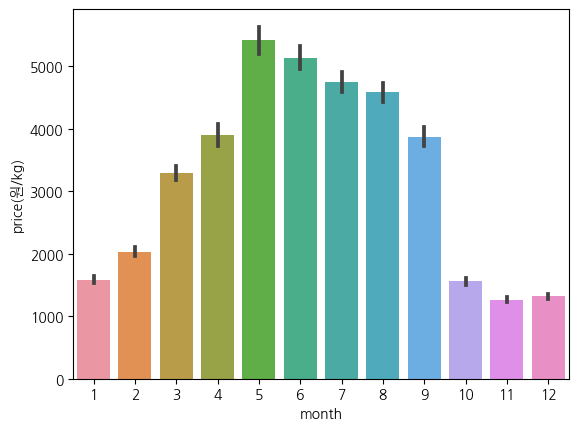

In [388]:
sns.barplot(data=data_TG,x='month',y='price(원/kg)')
plt.show()

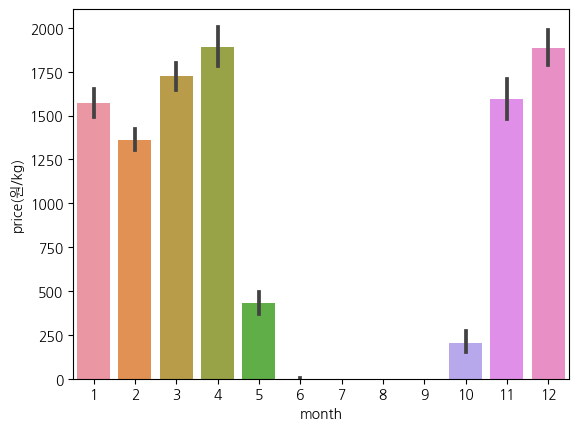

In [389]:
sns.barplot(data=data_BC,x='month',y='price(원/kg)')
plt.show()

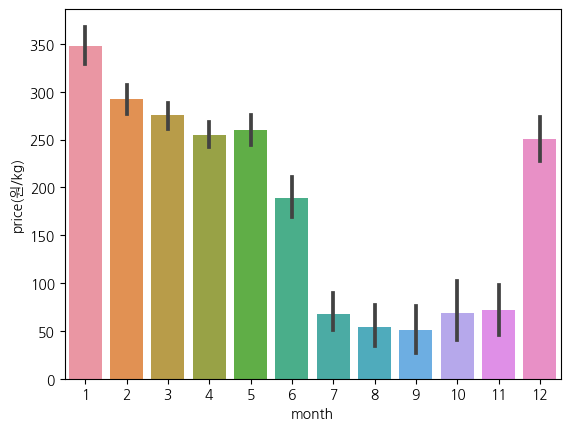

In [390]:
sns.barplot(data=data_RD,x='month',y='price(원/kg)')
plt.show()

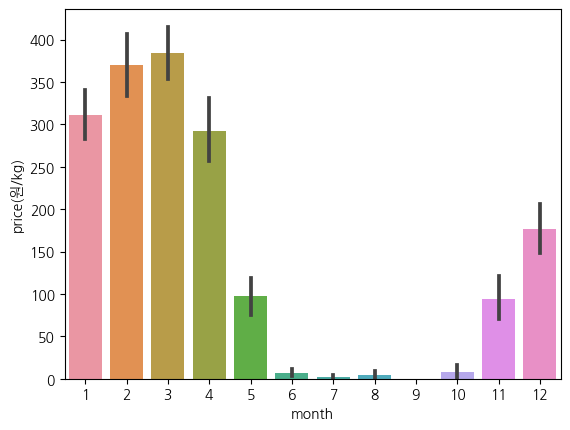

In [391]:
sns.barplot(data=data_CB,x='month',y='price(원/kg)')
plt.show()

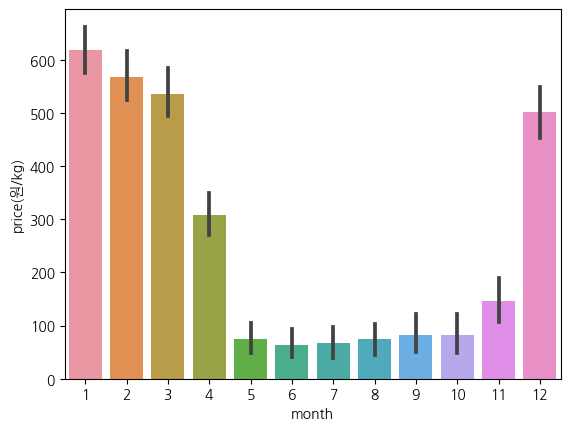

In [392]:
sns.barplot(data=data_CR,x='month',y='price(원/kg)')
plt.show()

In [393]:
## 테스트 데이터에도 똑같이 적용했습니다.
test = pd.read_csv('test.csv')
test['location'] = np.where(test['location']=='J',0,1)
test['timestamp'] = pd.to_datetime(test['timestamp'])

test_TG = test[test['item']=='TG'].copy()
test_BC = test[test['item']=='BC'].copy()
test_RD = test[test['item']=='RD'].copy()
test_CR = test[test['item']=='CR'].copy()
test_CB = test[test['item']=='CB'].copy()

test_TG['year'] = test_TG['timestamp'].dt.year
test_TG['month'] = test_TG['timestamp'].dt.month
test_TG['dayofweek'] = test_TG['timestamp'].dt.dayofweek

test_BC['year'] = test_BC['timestamp'].dt.year
test_BC['month'] = test_BC['timestamp'].dt.month
test_BC['dayofweek'] = test_BC['timestamp'].dt.dayofweek

test_RD['year'] = test_RD['timestamp'].dt.year
test_RD['month'] = test_RD['timestamp'].dt.month
test_RD['dayofweek'] = test_RD['timestamp'].dt.dayofweek

test_CR['year'] = test_CR['timestamp'].dt.year
test_CR['month'] = test_CR['timestamp'].dt.month
test_CR['dayofweek'] = test_CR['timestamp'].dt.dayofweek

test_CB['year'] = test_CB['timestamp'].dt.year
test_CB['month'] = test_CB['timestamp'].dt.month
test_CB['dayofweek'] = test_CB['timestamp'].dt.dayofweek

test_TG = test_TG.drop('item',axis=1)
test_BC = test_BC.drop('item',axis=1)
test_RD = test_RD.drop('item',axis=1)
test_CR = test_CR.drop('item',axis=1)
test_CB = test_CB.drop('item',axis=1)

test_TG = pd.merge(test_TG,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
test_TG['holiday'] = test_TG['holiday'].fillna(0)
test_TG['holiday'] = np.where(test_TG['holiday']==0,0,1)
test_TG['holiday'] = np.where(test_TG['dayofweek']>=5,1,test_TG['holiday'])
test_TG['season'] = test_TG['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})

test_BC = pd.merge(test_BC,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
test_BC['holiday'] = test_BC['holiday'].fillna(0)
test_BC['holiday'] = np.where(test_BC['holiday']==0,0,1)
test_BC['holiday'] = np.where(test_BC['dayofweek']>=5,1,test_BC['holiday'])
test_BC['season'] = test_BC['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})

test_RD = pd.merge(test_RD,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
test_RD['holiday'] = test_RD['holiday'].fillna(0)
test_RD['holiday'] = np.where(test_RD['holiday']==0,0,1)
test_RD['holiday'] = np.where(test_RD['dayofweek']>=5,1,test_RD['holiday'])
test_RD['season'] = test_RD['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})

test_CR = pd.merge(test_CR ,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
test_CR['holiday'] = test_CR['holiday'].fillna(0)
test_CR['holiday'] = np.where(test_CR['holiday']==0,0,1)
test_CR['holiday'] = np.where(test_CR['dayofweek']>=5,1,test_CR['holiday'])
test_CR['season'] = test_CR['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})

test_CB = pd.merge(test_CB,holiday,how='left',on='timestamp').rename(columns={1:'holiday'})
test_CB['holiday'] = test_CB['holiday'].fillna(0)
test_CB['holiday'] = np.where(test_CB['holiday']==0,0,1)
test_CB['holiday'] = np.where(test_CB['dayofweek']>=5,1,test_CB['holiday'])
test_CB['season'] = test_CB['month'].map({1:0,2:0,3:1,4:1,5:1,6:2,7:2,8:2,9:3,10:3,11:3,12:3})

test_TG['week'] = test_TG['timestamp'].dt.isocalendar().week
test_RD['week'] = test_RD['timestamp'].dt.isocalendar().week
test_BC['week'] = test_BC['timestamp'].dt.isocalendar().week
test_CR['week'] = test_CR['timestamp'].dt.isocalendar().week
test_CB['week'] = test_CB['timestamp'].dt.isocalendar().week

In [394]:
## international_trade.csv의 데이터를 그대로 사용하지않고 월 평균 데이터를 계산해서 활용했습니다.
## 감귤
a = data_TG.groupby(['month'])[['Export supply(kg)']].mean().reset_index().rename(columns={'Export supply(kg)':'Export supply_mean'})
b = data_TG.groupby(['month'])[['Export price']].mean().reset_index().rename(columns={'Export price':'Export price_mean'})
c = data_TG.groupby(['month'])[['import supply(kg)']].mean().reset_index().rename(columns={'import supply(kg)':'import supply_mean'})
d = data_TG.groupby(['month'])[['import price']].mean().reset_index().rename(columns={'import price':'import price_mean'})

data_TG = data_TG.drop(['Export supply(kg)','Export price','import supply(kg)','import price'],axis=1)

data_TG = pd.merge(data_TG,a,how='left')
data_TG = pd.merge(data_TG,b,how='left')
data_TG = pd.merge(data_TG,c,how='left')
data_TG = pd.merge(data_TG,d,how='left')
test_TG = pd.merge(test_TG,a,how='left')
test_TG = pd.merge(test_TG,b,how='left')
test_TG = pd.merge(test_TG,c,how='left')
test_TG = pd.merge(test_TG,d,how='left')
####
## 브로콜리
a = data_BC.groupby(['month'])[['Export supply(kg)']].mean().reset_index().rename(columns={'Export supply(kg)':'Export supply_mean'})
b = data_BC.groupby(['month'])[['Export price']].mean().reset_index().rename(columns={'Export price':'Export price_mean'})
c = data_BC.groupby(['month'])[['import supply(kg)']].mean().reset_index().rename(columns={'import supply(kg)':'import supply_mean'})
d = data_BC.groupby(['month'])[['import price']].mean().reset_index().rename(columns={'import price':'import price_mean'})

data_BC = data_BC.drop(['Export supply(kg)','Export price','import supply(kg)','import price'],axis=1)

data_BC = pd.merge(data_BC,a,how='left')
data_BC = pd.merge(data_BC,b,how='left')
data_BC = pd.merge(data_BC,c,how='left')
data_BC = pd.merge(data_BC,d,how='left')
test_BC = pd.merge(test_BC,a,how='left')
test_BC = pd.merge(test_BC,b,how='left')
test_BC = pd.merge(test_BC,c,how='left')
test_BC = pd.merge(test_BC,d,how='left')
####
## 당근
a = data_CR.groupby(['month'])[['Export supply(kg)']].mean().reset_index().rename(columns={'Export supply(kg)':'Export supply_mean'})
b = data_CR.groupby(['month'])[['Export price']].mean().reset_index().rename(columns={'Export price':'Export price_mean'})
c = data_CR.groupby(['month'])[['import supply(kg)']].mean().reset_index().rename(columns={'import supply(kg)':'import supply_mean'})
d = data_CR.groupby(['month'])[['import price']].mean().reset_index().rename(columns={'import price':'import price_mean'})

data_CR = data_CR.drop(['Export supply(kg)','Export price','import supply(kg)','import price'],axis=1)

data_CR = pd.merge(data_CR,a,how='left')
data_CR = pd.merge(data_CR,b,how='left')
data_CR = pd.merge(data_CR,c,how='left')
data_CR = pd.merge(data_CR,d,how='left')
test_CR = pd.merge(test_CR,a,how='left')
test_CR = pd.merge(test_CR,b,how='left')
test_CR = pd.merge(test_CR,c,how='left')
test_CR = pd.merge(test_CR,d,how='left')
####
## 양배추
a = data_CB.groupby(['month'])[['Export supply(kg)']].mean().reset_index().rename(columns={'Export supply(kg)':'Export supply_mean'})
b = data_CB.groupby(['month'])[['Export price']].mean().reset_index().rename(columns={'Export price':'Export price_mean'})
c = data_CB.groupby(['month'])[['import supply(kg)']].mean().reset_index().rename(columns={'import supply(kg)':'import supply_mean'})
d = data_CB.groupby(['month'])[['import price']].mean().reset_index().rename(columns={'import price':'import price_mean'})

data_CB = data_CB.drop(['Export supply(kg)','Export price','import supply(kg)','import price'],axis=1)

data_CB = pd.merge(data_CB,a,how='left')
data_CB = pd.merge(data_CB,b,how='left')
data_CB = pd.merge(data_CB,c,how='left')
data_CB = pd.merge(data_CB,d,how='left')
test_CB = pd.merge(test_CB,a,how='left')
test_CB = pd.merge(test_CB,b,how='left')
test_CB = pd.merge(test_CB,c,how='left')
test_CB = pd.merge(test_CB,d,how='left')

## 모델링1

In [395]:
## 회사별 월 평균 가격, 회사별 주 평균 가격, 회사별 요일별 평균 가격, 회사별 계절별 평균 가격
## 계절별 평균 가격
## 회사별 월 평균 유통된 물량, 회사별 요일 평균 유통된 물량, 회사별 계절 평균 유통된 물량
## 활용

a = data_TG.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_TG.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_TG.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
e = data_TG.groupby(['corporation','season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'season_price'})
f = data_TG.groupby(['season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'t_season_price'})

g = data_TG.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_TG.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_TG.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_TG_1 = pd.merge(data_TG,a,how='left')
data_TG_1 = pd.merge(data_TG_1,b,how='left')
data_TG_1 = pd.merge(data_TG_1,c,how='left')
data_TG_1 = pd.merge(data_TG_1,e,how='left')
data_TG_1 = pd.merge(data_TG_1,f,how='left')
data_TG_1 = pd.merge(data_TG_1,g,how='left')
data_TG_1 = pd.merge(data_TG_1,h,how='left')
data_TG_1 = pd.merge(data_TG_1,i,how='left')


test_TG_1 = pd.merge(test_TG,a,how='left')
test_TG_1 = pd.merge(test_TG_1,b,how='left')
test_TG_1 = pd.merge(test_TG_1,c,how='left')
test_TG_1 = pd.merge(test_TG_1,e,how='left')
test_TG_1 = pd.merge(test_TG_1,f,how='left')
test_TG_1 = pd.merge(test_TG_1,g,how='left')
test_TG_1 = pd.merge(test_TG_1,h,how='left')
test_TG_1 = pd.merge(test_TG_1,i,how='left')

a = data_BC.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_BC.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_BC.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
e = data_BC.groupby(['corporation','season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'season_price'})
f = data_BC.groupby(['season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'t_season_price'})

g = data_BC.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_BC.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_BC.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_BC_1 = pd.merge(data_BC,a,how='left')
data_BC_1 = pd.merge(data_BC_1,b,how='left')
data_BC_1 = pd.merge(data_BC_1,c,how='left')
data_BC_1 = pd.merge(data_BC_1,e,how='left')
data_BC_1 = pd.merge(data_BC_1,f,how='left')
data_BC_1 = pd.merge(data_BC_1,g,how='left')
data_BC_1 = pd.merge(data_BC_1,h,how='left')
data_BC_1 = pd.merge(data_BC_1,i,how='left')

test_BC_1 = pd.merge(test_BC,a,how='left')
test_BC_1 = pd.merge(test_BC_1,b,how='left')
test_BC_1 = pd.merge(test_BC_1,c,how='left')
test_BC_1 = pd.merge(test_BC_1,e,how='left')
test_BC_1 = pd.merge(test_BC_1,f,how='left')
test_BC_1 = pd.merge(test_BC_1,g,how='left')
test_BC_1 = pd.merge(test_BC_1,h,how='left')
test_BC_1 = pd.merge(test_BC_1,i,how='left')

a = data_RD.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_RD.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_RD.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
e = data_RD.groupby(['corporation','season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'season_price'})
f = data_RD.groupby(['season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'t_season_price'})

g = data_RD.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_RD.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_RD.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_RD_1 = pd.merge(data_RD,a,how='left')
data_RD_1 = pd.merge(data_RD_1,b,how='left')
data_RD_1 = pd.merge(data_RD_1,c,how='left')
data_RD_1 = pd.merge(data_RD_1,e,how='left')
data_RD_1 = pd.merge(data_RD_1,f,how='left')
data_RD_1 = pd.merge(data_RD_1,g,how='left')
data_RD_1 = pd.merge(data_RD_1,h,how='left')
data_RD_1 = pd.merge(data_RD_1,i,how='left')

test_RD_1 = pd.merge(test_RD,a,how='left')
test_RD_1 = pd.merge(test_RD_1,b,how='left')
test_RD_1 = pd.merge(test_RD_1,c,how='left')
test_RD_1 = pd.merge(test_RD_1,e,how='left')
test_RD_1 = pd.merge(test_RD_1,f,how='left')
test_RD_1 = pd.merge(test_RD_1,g,how='left')
test_RD_1 = pd.merge(test_RD_1,h,how='left')
test_RD_1 = pd.merge(test_RD_1,i,how='left')

a = data_CR.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_CR.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_CR.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
e = data_CR.groupby(['corporation','season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'season_price'})
f = data_CR.groupby(['season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'t_season_price'})

g = data_CR.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_CR.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_CR.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_CR_1 = pd.merge(data_CR,a,how='left')
data_CR_1 = pd.merge(data_CR_1,b,how='left')
data_CR_1 = pd.merge(data_CR_1,c,how='left')
data_CR_1 = pd.merge(data_CR_1,e,how='left')
data_CR_1 = pd.merge(data_CR_1,f,how='left')
data_CR_1 = pd.merge(data_CR_1,g,how='left')
data_CR_1 = pd.merge(data_CR_1,h,how='left')
data_CR_1 = pd.merge(data_CR_1,i,how='left')


test_CR_1 = pd.merge(test_CR,a,how='left')
test_CR_1 = pd.merge(test_CR_1,b,how='left')
test_CR_1 = pd.merge(test_CR_1,c,how='left')
test_CR_1 = pd.merge(test_CR_1,e,how='left')
test_CR_1 = pd.merge(test_CR_1,f,how='left')
test_CR_1 = pd.merge(test_CR_1,g,how='left')
test_CR_1 = pd.merge(test_CR_1,h,how='left')
test_CR_1 = pd.merge(test_CR_1,i,how='left')


a = data_CB.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_CB.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_CB.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
e = data_CB.groupby(['corporation','season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'season_price'})
f = data_CB.groupby(['season'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'t_season_price'})

g = data_CB.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_CB.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_CB.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_CB_1 = pd.merge(data_CB,a,how='left')
data_CB_1 = pd.merge(data_CB_1,b,how='left')
data_CB_1 = pd.merge(data_CB_1,c,how='left')
data_CB_1 = pd.merge(data_CB_1,e,how='left')
data_CB_1 = pd.merge(data_CB_1,f,how='left')
data_CB_1 = pd.merge(data_CB_1,g,how='left')
data_CB_1 = pd.merge(data_CB_1,h,how='left')
data_CB_1 = pd.merge(data_CB_1,i,how='left')

test_CB_1 = pd.merge(test_CB,a,how='left')
test_CB_1 = pd.merge(test_CB_1,b,how='left')
test_CB_1 = pd.merge(test_CB_1,c,how='left')
test_CB_1 = pd.merge(test_CB_1,e,how='left')
test_CB_1 = pd.merge(test_CB_1,f,how='left')
test_CB_1 = pd.merge(test_CB_1,g,how='left')
test_CB_1 = pd.merge(test_CB_1,h,how='left')
test_CB_1 = pd.merge(test_CB_1,i,how='left')

## 학습에 사용하지 않을 변수들을 제거합니다
data_TG_1 = data_TG_1.drop(['ID','supply(kg)','timestamp'],axis=1)
data_RD_1 = data_RD_1.drop(['ID','supply(kg)','timestamp'],axis=1)
data_BC_1 = data_BC_1.drop(['ID','supply(kg)','timestamp'],axis=1)
data_CB_1 = data_CB_1.drop(['ID','supply(kg)','timestamp'],axis=1)
data_CR_1 = data_CR_1.drop(['ID','supply(kg)','timestamp'],axis=1)

test_TGid_1 = test_TG_1['ID']
test_RDid_1 = test_RD_1['ID']
test_BCid_1 = test_BC_1['ID']
test_CBid_1 = test_CB_1['ID']
test_CRid_1 = test_CR_1['ID']

## 학습에 사용하지 않을 변수들을 제거합니다
test_TG_1 = test_TG_1.drop(['ID','timestamp'],axis=1)
test_RD_1 = test_RD_1.drop(['ID','timestamp'],axis=1)
test_BC_1 = test_BC_1.drop(['ID','timestamp'],axis=1)
test_CB_1 = test_CB_1.drop(['ID','timestamp'],axis=1)
test_CR_1 = test_CR_1.drop(['ID','timestamp'],axis=1)

## corporation 원핫인코딩
data_TG_1 = pd.get_dummies(data_TG_1,columns=['corporation'],drop_first=True)
data_RD_1 = pd.get_dummies(data_RD_1,columns=['corporation'],drop_first=True)
data_BC_1 = pd.get_dummies(data_BC_1,columns=['corporation'],drop_first=True)
data_CB_1 = pd.get_dummies(data_CB_1,columns=['corporation'],drop_first=True)
data_CR_1 = pd.get_dummies(data_CR_1,columns=['corporation'],drop_first=True)

test_TG_1 = pd.get_dummies(test_TG_1,columns=['corporation'],drop_first=True)
test_RD_1 = pd.get_dummies(test_RD_1,columns=['corporation'],drop_first=True)
test_BC_1 = pd.get_dummies(test_BC_1,columns=['corporation'],drop_first=True)
test_CB_1 = pd.get_dummies(test_CB_1,columns=['corporation'],drop_first=True)
test_CR_1 = pd.get_dummies(test_CR_1,columns=['corporation'],drop_first=True)

In [396]:
data_TG_1

,location,price(원/kg),year,month,dayofweek,holiday,season,week,Export supply_mean,Export price_mean,import supply_mean,import price_mean,month_price,week_price,dayofweek_price,season_price,t_season_price,month_supply,season_supply,dayofweek_supply,corporation_B,corporation_C,corporation_D,corporation_E
0,0,0.0,2019,1,1,1,0,1,192621.60000,317.400000,0.200000,0.000000,1632.193548,1338.838235,3635.006881,1825.217905,1798.973986,51873.570968,39714.887669,21319.130963,0,0,0,0
1,0,0.0,2019,1,2,0,0,1,192621.60000,317.400000,0.200000,0.000000,1632.193548,1338.838235,3643.678899,1825.217905,1798.973986,51873.570968,39714.887669,20133.136239,0,0,0,0
2,0,1728.0,2019,1,3,0,0,1,192621.60000,317.400000,0.200000,0.000000,1632.193548,1338.838235,3808.649083,1825.217905,1798.973986,51873.570968,39714.887669,19418.542661,0,0,0,0
3,0,1408.0,2019,1,4,0,0,1,192621.60000,317.400000,0.200000,0.000000,1632.193548,1338.838235,3654.064220,1825.217905,1798.973986,51873.570968,39714.887669,21360.980505,0,0,0,0
4,0,1250.0,2019,1,5,1,0,1,192621.60000,317.400000,0.200000,0.000000,1632.193548,1338.838235,3296.682028,1825.217905,1798.973986,51873.570968,39714.887669,19989.015438,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15225,1,3418.0,2023,2,0,0,0,9,23906.06383,112.978723,15371.404255,51.035461,1767.695035,2394.939394,3261.608295,1643.766892,1798.973986,12071.144326,21042.803885,14261.366820,0,0,0,1
15226,1,3141.0,2023,2,1,0,0,9,23906.06383,112.978723,15371.404255,51.035461,1767.695035,2394.939394,3238.832569,1643.766892,1798.973986,12071.144326,21042.803885,11522.397248,0,0,0,1
15227,1,4235.0,2023,3,2,1,1,9,7200.11811,33.755906,5211.157480,16.472441,2548.618110,2394.939394,3064.550459,3171.223720,4201.992722,3860.204724,1794.650943,12147.863073,0,0,0,1
15228,1,3960.0,2023,3,3,0,1,9,7200.11811,33.755906,5211.157480,16.472441,2548.618110,2394.939394,3012.997706,3171.223720,4201.992722,3860.204724,1794.650943,11470.865367,0,0,0,1


In [397]:
## 당근데이터로 모델 선정을 해보았을때
## catboost가 가장 좋은 것으로 나타남
## 다른 데이터도 유사하게 나타남
## 모든데이터 예측을 catboost로 진행

x = data_TG_1.drop('price(원/kg)',axis=1)
y = data_TG_1['price(원/kg)']
kf = KFold(n_splits=5,shuffle=True,random_state=42)

model_rf = RandomForestRegressor(random_state=42,n_jobs=-1)
model_xgb = XGBRegressor(random_state=42)
model_lgbm = LGBMRegressor(random_state=42,n_jobs=-1)

cv_result_rf = cross_val_score(model_rf,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result_xgb = cross_val_score(model_xgb,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error')
cv_result_lgbm = cross_val_score(model_lgbm,x,y,cv=kf,n_jobs=-1,scoring='neg_mean_squared_error')

cv_result_rf_ = []
cv_result_xgb_ = []
cv_result_lgbm_ = []

for i in cv_result_rf:
    cv_result_rf_.append(np.sqrt(-i))
for i in cv_result_xgb:
    cv_result_xgb_.append(np.sqrt(-i))
for i in cv_result_lgbm:
    cv_result_lgbm_.append(np.sqrt(-i))

print('RandomForest 평균 RMSE : ',np.mean(cv_result_rf_))
print('xgboost 평균 RMSE : ',np.mean(cv_result_xgb_))
print('lightgbm 평균 RMSE : ',np.mean(cv_result_lgbm_))

cv_result_cat = []
for i,j in kf.split(x,y):
    x_train = x.iloc[i]
    x_valid = x.iloc[j]
    
    y_train = y.iloc[i]
    y_valid = y.iloc[j]
    
    model_cat = CatBoostRegressor(random_state=42)
    model_cat.fit(x_train, y_train, eval_set=(x_valid, y_valid),verbose=0)
    y_pred = model_cat.predict(x_valid)
    cv_result_cat.append(np.sqrt(mean_squared_error(y_valid,y_pred)))
print('catboost 평균 RMSE : ',np.mean(cv_result_cat))

RandomForest 평균 RMSE :  1600.3049473167423
xgboost 평균 RMSE :  1592.0621625887438
lightgbm 평균 RMSE :  1539.8464725113627
catboost 평균 RMSE :  1531.9906917895994


In [405]:
x = data_TG_1.drop('price(원/kg)',axis=1)
y = data_TG_1['price(원/kg)']

x['week'] = x['week'].astype(int)

model = CatBoostRegressor(random_state=42)
model.fit(x, y,verbose=0)
y_pred_all = model.predict(test_TG_1)

## 0이하인것은 0으로 변경
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_tg = pd.DataFrame(columns=['ID'],data=test_TGid_1)
pred_tg['answer'] = y_pred_all

In [399]:
x = data_BC_1.drop('price(원/kg)',axis=1)
y = data_BC_1['price(원/kg)']

x['week'] = x['week'].astype(int)

model = CatBoostRegressor(random_state=42)
model.fit(x, y,verbose=0)
y_pred_all = model.predict(test_BC_1)

## 0이하인것은 0으로 변경
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_BC = pd.DataFrame(columns=['ID'],data=test_BCid_1)
pred_BC['answer'] = y_pred_all

In [400]:
x = data_RD_1.drop('price(원/kg)',axis=1)
y = data_RD_1['price(원/kg)']

x['week'] = x['week'].astype(int)

model = CatBoostRegressor(random_state=42)
model.fit(x, y,verbose=0)
y_pred_all = model.predict(test_RD_1)

## 0이하인것은 0으로 변경
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_RD = pd.DataFrame(columns=['ID'],data=test_RDid_1)
pred_RD['answer'] = y_pred_all

In [407]:
x = data_CB_1.drop('price(원/kg)',axis=1)
y = data_CB_1['price(원/kg)']

x['week'] = x['week'].astype(int)

model = CatBoostRegressor(random_state=42)
model.fit(x, y,verbose=0)
y_pred_all = model.predict(test_CB_1)

## 0이하인것은 0으로 변경
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_CB = pd.DataFrame(columns=['ID'],data=test_CBid_1)
pred_CB['answer'] = y_pred_all

In [402]:
x = data_CR_1.drop('price(원/kg)',axis=1)
y = data_CR_1['price(원/kg)']

x['week'] = x['week'].astype(int)

model = CatBoostRegressor(random_state=42)
model.fit(x, y,verbose=0)
y_pred_all = model.predict(test_CR_1)

## 0이하인것은 0으로 변경
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_CR = pd.DataFrame(columns=['ID'],data=test_CRid_1)
pred_CR['answer'] = y_pred_all

pred_1 = pd.concat([pred_tg,pred_BC,pred_RD,pred_CB,pred_CR],axis=0).reset_index(drop=True)

## 모델링2

,feature_name,feature_importance
0,year,25.587625
1,week_price,20.886122
2,location,11.474358
3,dayofweek,8.125957
4,dayofweek_supply,6.101588
5,week,4.823814
6,month_price,4.721462
7,dayofweek_price,3.618341
8,holiday,2.715841
9,month_supply,2.240721


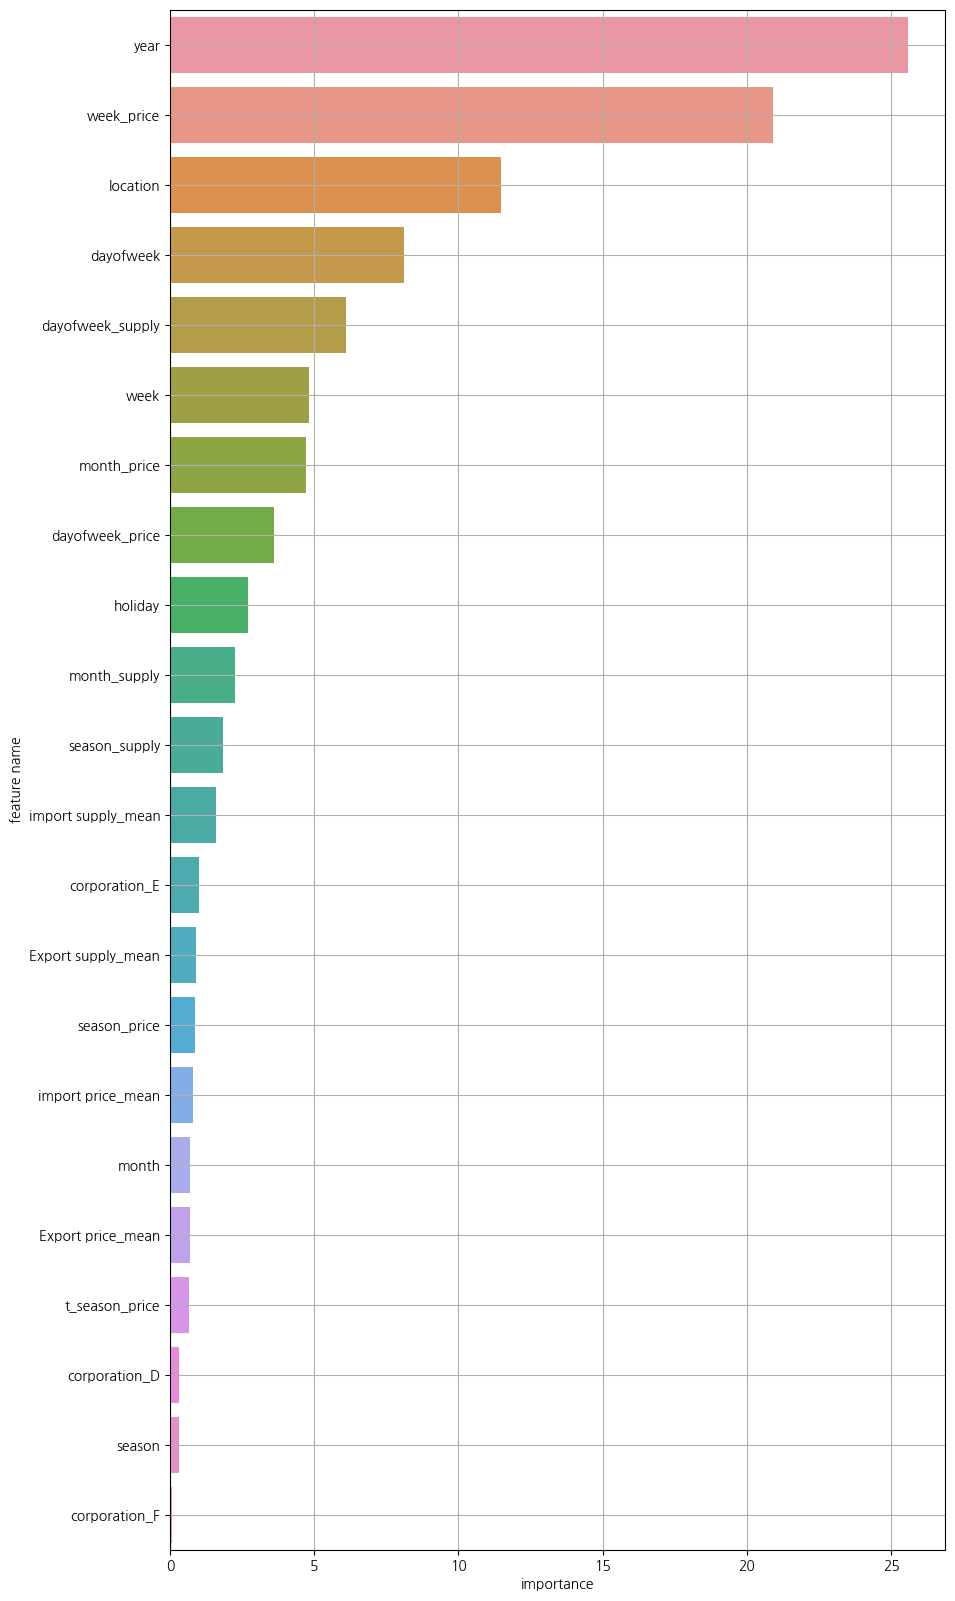

In [408]:
def plot_feature_importance(importance, names, result_only = False, topn = 'all'):
    feature_importance = np.array(importance)
    feature_name = np.array(names)

    data={'feature_name':feature_name,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    #변수의 특성 중요도 순으로 정렬하기
    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    #변수의 특성 중요도 그래프로 그리기
    if result_only == False :
        plt.figure(figsize=(10,20))
        sns.barplot(x='feature_importance', y='feature_name', data = fi_df)

        plt.xlabel('importance')
        plt.ylabel('feature name')
        plt.grid()

    return fi_df
plot_feature_importance(model.feature_importances_,x.columns,result_only = False)

In [22]:
## 회사별 월 평균 가격, 회사별 주 평균 가격, 회사별 요일별 평균 가격
## 회사별 월 평균 유통된 물량, 회사별 요일 평균 유통된 물량, 회사별 계절 평균 유통된 물량
## 활용

a = data_TG.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_TG.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_TG.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})

g = data_TG.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_TG.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_TG.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_TG_2 = pd.merge(data_TG,a,how='left')
data_TG_2 = pd.merge(data_TG_2,b,how='left')
data_TG_2 = pd.merge(data_TG_2,c,how='left')
data_TG_2 = pd.merge(data_TG_2,g,how='left')
data_TG_2 = pd.merge(data_TG_2,h,how='left')
data_TG_2 = pd.merge(data_TG_2,i,how='left')


test_TG_2 = pd.merge(test_TG,a,how='left')
test_TG_2 = pd.merge(test_TG_2,b,how='left')
test_TG_2 = pd.merge(test_TG_2,c,how='left')
test_TG_2 = pd.merge(test_TG_2,g,how='left')
test_TG_2 = pd.merge(test_TG_2,h,how='left')
test_TG_2 = pd.merge(test_TG_2,i,how='left')



a = data_BC.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_BC.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_BC.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_BC.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_BC.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_BC.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})



data_BC_2 = pd.merge(data_BC,a,how='left')
data_BC_2 = pd.merge(data_BC_2,b,how='left')
data_BC_2 = pd.merge(data_BC_2,c,how='left')
data_BC_2 = pd.merge(data_BC_2,g,how='left')
data_BC_2 = pd.merge(data_BC_2,h,how='left')
data_BC_2 = pd.merge(data_BC_2,i,how='left')

test_BC_2 = pd.merge(test_BC,a,how='left')
test_BC_2 = pd.merge(test_BC_2,b,how='left')
test_BC_2 = pd.merge(test_BC_2,c,how='left')
test_BC_2 = pd.merge(test_BC_2,g,how='left')
test_BC_2 = pd.merge(test_BC_2,h,how='left')
test_BC_2 = pd.merge(test_BC_2,i,how='left')



a = data_RD.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_RD.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_RD.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_RD.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_RD.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_RD.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})



data_RD_2 = pd.merge(data_RD,a,how='left')
data_RD_2 = pd.merge(data_RD_2,b,how='left')
data_RD_2 = pd.merge(data_RD_2,c,how='left')
data_RD_2 = pd.merge(data_RD_2,g,how='left')
data_RD_2 = pd.merge(data_RD_2,h,how='left')
data_RD_2 = pd.merge(data_RD_2,i,how='left')



test_RD_2 = pd.merge(test_RD,a,how='left')
test_RD_2 = pd.merge(test_RD_2,b,how='left')
test_RD_2 = pd.merge(test_RD_2,c,how='left')
test_RD_2 = pd.merge(test_RD_2,g,how='left')
test_RD_2 = pd.merge(test_RD_2,h,how='left')
test_RD_2 = pd.merge(test_RD_2,i,how='left')



a = data_CR.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_CR.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_CR.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_CR.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_CR.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_CR.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_CR_2 = pd.merge(data_CR,a,how='left')
data_CR_2 = pd.merge(data_CR_2,b,how='left')
data_CR_2 = pd.merge(data_CR_2,c,how='left')
data_CR_2 = pd.merge(data_CR_2,g,how='left')
data_CR_2 = pd.merge(data_CR_2,h,how='left')
data_CR_2 = pd.merge(data_CR_2,i,how='left')


test_CR_2 = pd.merge(test_CR,a,how='left')
test_CR_2 = pd.merge(test_CR_2,b,how='left')
test_CR_2 = pd.merge(test_CR_2,c,how='left')
test_CR_2 = pd.merge(test_CR_2,g,how='left')
test_CR_2 = pd.merge(test_CR_2,h,how='left')
test_CR_2 = pd.merge(test_CR_2,i,how='left')


a = data_CB.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
b = data_CB.groupby(['corporation','week'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'week_price'})
c = data_CB.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_CB.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
h = data_CB.groupby(['corporation','season'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'season_supply'})
i = data_CB.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})



data_CB_2 = pd.merge(data_CB,a,how='left')
data_CB_2 = pd.merge(data_CB_2,b,how='left')
data_CB_2 = pd.merge(data_CB_2,c,how='left')
data_CB_2 = pd.merge(data_CB_2,g,how='left')
data_CB_2 = pd.merge(data_CB_2,h,how='left')
data_CB_2 = pd.merge(data_CB_2,i,how='left')



test_CB_2 = pd.merge(test_CB,a,how='left')
test_CB_2 = pd.merge(test_CB_2,b,how='left')
test_CB_2 = pd.merge(test_CB_2,c,how='left')
test_CB_2 = pd.merge(test_CB_2,g,how='left')
test_CB_2 = pd.merge(test_CB_2,h,how='left')
test_CB_2 = pd.merge(test_CB_2,i,how='left')

## 학습에 사용하지 않을 변수들을 제거합니다
data_TG_2 = data_TG_2.drop(['ID','supply(kg)','timestamp'],axis=1)
data_RD_2 = data_RD_2.drop(['ID','supply(kg)','timestamp'],axis=1)
data_BC_2 = data_BC_2.drop(['ID','supply(kg)','timestamp'],axis=1)
data_CB_2 = data_CB_2.drop(['ID','supply(kg)','timestamp'],axis=1)
data_CR_2 = data_CR_2.drop(['ID','supply(kg)','timestamp'],axis=1)

test_TGid_2 = test_TG_2['ID']
test_RDid_2 = test_RD_2['ID']
test_BCid_2 = test_BC_2['ID']
test_CBid_2 = test_CB_2['ID']
test_CRid_2 = test_CR_2['ID']

## 학습에 사용하지 않을 변수들을 제거합니다
test_TG_2 = test_TG_2.drop(['ID','timestamp'],axis=1)
test_RD_2 = test_RD_2.drop(['ID','timestamp'],axis=1)
test_BC_2 = test_BC_2.drop(['ID','timestamp'],axis=1)
test_CB_2 = test_CB_2.drop(['ID','timestamp'],axis=1)
test_CR_2 = test_CR_2.drop(['ID','timestamp'],axis=1)

## corporation 원핫인코딩
data_TG_2 = pd.get_dummies(data_TG_2,columns=['corporation'],drop_first=True)
data_RD_2 = pd.get_dummies(data_RD_2,columns=['corporation'],drop_first=True)
data_BC_2 = pd.get_dummies(data_BC_2,columns=['corporation'],drop_first=True)
data_CB_2 = pd.get_dummies(data_CB_2,columns=['corporation'],drop_first=True)
data_CR_2 = pd.get_dummies(data_CR_2,columns=['corporation'],drop_first=True)

test_TG_2 = pd.get_dummies(test_TG_2,columns=['corporation'],drop_first=True)
test_RD_2 = pd.get_dummies(test_RD_2,columns=['corporation'],drop_first=True)
test_BC_2 = pd.get_dummies(test_BC_2,columns=['corporation'],drop_first=True)
test_CB_2 = pd.get_dummies(test_CB_2,columns=['corporation'],drop_first=True)
test_CR_2 = pd.get_dummies(test_CR_2,columns=['corporation'],drop_first=True)

In [23]:
x = data_TG_2.drop('price(원/kg)',axis=1)
y = data_TG_2['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_TG_2)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_tg = pd.DataFrame(columns=['ID'],data=test_TGid_2)
pred_tg['answer'] = y_pred_all

In [24]:
x = data_BC_2.drop('price(원/kg)',axis=1)
y = data_BC_2['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_BC_2)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_BC = pd.DataFrame(columns=['ID'],data=test_BCid_2)
pred_BC['answer'] = y_pred_all

In [25]:
x = data_RD_2.drop('price(원/kg)',axis=1)
y = data_RD_2['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_RD_2)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_RD = pd.DataFrame(columns=['ID'],data=test_RDid_2)
pred_RD['answer'] = y_pred_all

In [26]:
x = data_CB_2.drop('price(원/kg)',axis=1)
y = data_CB_2['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_CB_2)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_CB = pd.DataFrame(columns=['ID'],data=test_CBid_2)
pred_CB['answer'] = y_pred_all

In [27]:
x = data_CR_2.drop('price(원/kg)',axis=1)
y = data_CR_2['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_CR_2)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_CR = pd.DataFrame(columns=['ID'],data=test_CRid_2)
pred_CR['answer'] = y_pred_all

pred_2 = pd.concat([pred_tg,pred_BC,pred_RD,pred_CB,pred_CR],axis=0).reset_index(drop=True)

## 모델링3

In [28]:
## 회사별 월 평균 가격, 회사별 요일 평균 가격
## 회사별 월 평균 유통된 물량, 회사별 요일 평균 유통된 물량
## 활용

a = data_TG.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
c = data_TG.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_TG.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
i = data_TG.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_TG_3 = pd.merge(data_TG,a,how='left')
data_TG_3 = pd.merge(data_TG_3,c,how='left')
data_TG_3 = pd.merge(data_TG_3,g,how='left')
data_TG_3 = pd.merge(data_TG_3,i,how='left')

test_TG_3 = pd.merge(test_TG,a,how='left')
test_TG_3 = pd.merge(test_TG_3,c,how='left')
test_TG_3 = pd.merge(test_TG_3,g,how='left')
test_TG_3 = pd.merge(test_TG_3,i,how='left')


a = data_BC.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
c = data_BC.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_BC.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
i = data_BC.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_BC_3 = pd.merge(data_BC,a,how='left')
data_BC_3 = pd.merge(data_BC_3,c,how='left')
data_BC_3 = pd.merge(data_BC_3,g,how='left')
data_BC_3 = pd.merge(data_BC_3,i,how='left')

test_BC_3 = pd.merge(test_BC,a,how='left')
test_BC_3 = pd.merge(test_BC_3,c,how='left')
test_BC_3 = pd.merge(test_BC_3,g,how='left')
test_BC_3 = pd.merge(test_BC_3,i,how='left')

a = data_RD.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
c = data_RD.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_RD.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
i = data_RD.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_RD_3 = pd.merge(data_RD,a,how='left')
data_RD_3 = pd.merge(data_RD_3,c,how='left')
data_RD_3 = pd.merge(data_RD_3,g,how='left')
data_RD_3 = pd.merge(data_RD_3,i,how='left')

test_RD_3 = pd.merge(test_RD,a,how='left')
test_RD_3 = pd.merge(test_RD_3,c,how='left')
test_RD_3 = pd.merge(test_RD_3,g,how='left')
test_RD_3 = pd.merge(test_RD_3,i,how='left')

a = data_CR.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
c = data_CR.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_CR.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
i = data_CR.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_CR_3 = pd.merge(data_CR,a,how='left')
data_CR_3 = pd.merge(data_CR_3,c,how='left')
data_CR_3 = pd.merge(data_CR_3,g,how='left')
data_CR_3 = pd.merge(data_CR_3,i,how='left')

test_CR_3 = pd.merge(test_CR,a,how='left')
test_CR_3 = pd.merge(test_CR_3,c,how='left')
test_CR_3 = pd.merge(test_CR_3,g,how='left')
test_CR_3 = pd.merge(test_CR_3,i,how='left')


a = data_CB.groupby(['corporation','month'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'month_price'})
c = data_CB.groupby(['corporation','dayofweek'])[['price(원/kg)']].mean().reset_index().rename(columns={'price(원/kg)':'dayofweek_price'})
g = data_CB.groupby(['corporation','month'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'month_supply'})
i = data_CB.groupby(['corporation','dayofweek'])[['supply(kg)']].mean().reset_index().rename(columns={'supply(kg)':'dayofweek_supply'})

data_CB_3 = pd.merge(data_CB,a,how='left')
data_CB_3 = pd.merge(data_CB_3,c,how='left')
data_CB_3 = pd.merge(data_CB_3,g,how='left')
data_CB_3 = pd.merge(data_CB_3,i,how='left')

test_CB_3 = pd.merge(test_CB,a,how='left')
test_CB_3 = pd.merge(test_CB_3,c,how='left')
test_CB_3 = pd.merge(test_CB_3,g,how='left')
test_CB_3 = pd.merge(test_CB_3,i,how='left')


## 학습에 사용하지 않을 변수들을 제거합니다
data_TG_3 = data_TG_3.drop(['ID','supply(kg)','timestamp'],axis=1)
data_RD_3 = data_RD_3.drop(['ID','supply(kg)','timestamp'],axis=1)
data_BC_3 = data_BC_3.drop(['ID','supply(kg)','timestamp'],axis=1)
data_CB_3 = data_CB_3.drop(['ID','supply(kg)','timestamp'],axis=1)
data_CR_3 = data_CR_3.drop(['ID','supply(kg)','timestamp'],axis=1)

test_TGid_3 = test_TG_3['ID']
test_RDid_3 = test_RD_3['ID']
test_BCid_3 = test_BC_3['ID']
test_CBid_3 = test_CB_3['ID']
test_CRid_3 = test_CR_3['ID']

## 학습에 사용하지 않을 변수들을 제거합니다
test_TG_3 = test_TG_3.drop(['ID','timestamp'],axis=1)
test_RD_3 = test_RD_3.drop(['ID','timestamp'],axis=1)
test_BC_3 = test_BC_3.drop(['ID','timestamp'],axis=1)
test_CB_3 = test_CB_3.drop(['ID','timestamp'],axis=1)
test_CR_3 = test_CR_3.drop(['ID','timestamp'],axis=1)

## corporation 원핫인코딩
data_TG_3 = pd.get_dummies(data_TG_3,columns=['corporation'],drop_first=True)
data_RD_3 = pd.get_dummies(data_RD_3,columns=['corporation'],drop_first=True)
data_BC_3 = pd.get_dummies(data_BC_3,columns=['corporation'],drop_first=True)
data_CB_3 = pd.get_dummies(data_CB_3,columns=['corporation'],drop_first=True)
data_CR_3 = pd.get_dummies(data_CR_3,columns=['corporation'],drop_first=True)

test_TG_3 = pd.get_dummies(test_TG_3,columns=['corporation'],drop_first=True)
test_RD_3 = pd.get_dummies(test_RD_3,columns=['corporation'],drop_first=True)
test_BC_3 = pd.get_dummies(test_BC_3,columns=['corporation'],drop_first=True)
test_CB_3 = pd.get_dummies(test_CB_3,columns=['corporation'],drop_first=True)
test_CR_3 = pd.get_dummies(test_CR_3,columns=['corporation'],drop_first=True)

In [29]:
x = data_TG_3.drop('price(원/kg)',axis=1)
y = data_TG_3['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_TG_3)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_tg = pd.DataFrame(columns=['ID'],data=test_TGid_3)
pred_tg['answer'] = y_pred_all

In [30]:
x = data_BC_3.drop('price(원/kg)',axis=1)
y = data_BC_3['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_BC_3)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_BC = pd.DataFrame(columns=['ID'],data=test_BCid_3)
pred_BC['answer'] = y_pred_all

In [31]:
x = data_RD_3.drop('price(원/kg)',axis=1)
y = data_RD_3['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_RD_3)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_RD = pd.DataFrame(columns=['ID'],data=test_RDid_3)
pred_RD['answer'] = y_pred_all

In [32]:
x = data_CB_3.drop('price(원/kg)',axis=1)
y = data_CB_3['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_CB_3)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_CB = pd.DataFrame(columns=['ID'],data=test_CBid_3)
pred_CB['answer'] = y_pred_all

In [33]:
x = data_CR_3.drop('price(원/kg)',axis=1)
y = data_CR_3['price(원/kg)']

x['week'] = x['week'].astype(int)

model_rf = CatBoostRegressor(random_state=42)
model_rf.fit(x, y,verbose=0)
y_pred_all = model_rf.predict(test_CR_3)
y_pred_all = np.where(y_pred_all < 0,0,y_pred_all)

pred_CR = pd.DataFrame(columns=['ID'],data=test_CRid_3)
pred_CR['answer'] = y_pred_all

pred_3 = pd.concat([pred_tg,pred_BC,pred_RD,pred_CB,pred_CR],axis=0).reset_index(drop=True)

In [34]:
pred = pred_1['answer']*0.3 + pred_2['answer']*0.35 + pred_3['answer']*0.35
pre = pd.DataFrame(columns=['ID'],data=pred_1['ID'])
pre['answer'] = pred

In [35]:
sub = pd.read_csv('sample_submission.csv')
sub = sub.drop('answer',axis=1)
sub = pd.merge(sub,pre,how='left')
sub

,ID,answer
0,TG_A_J_20230304,3224.382151
1,TG_A_J_20230305,0.000000
2,TG_A_J_20230306,3501.105762
3,TG_A_J_20230307,3372.858093
4,TG_A_J_20230308,3530.883074
...,...,...
1087,RD_F_J_20230327,520.717044
1088,RD_F_J_20230328,508.375092
1089,RD_F_J_20230329,474.160675
1090,RD_F_J_20230330,466.391476


In [ ]:
# 제출
sub.to_csv('result.csv',index=False)